# Delivered

Description of incremental development/changes throughout the project.

## Cycle 1

1. Business Planning
     - Business problem
     - Input
     - Output
     - Process
     - Desk research
     
2. Feature Engineering
     - Recency
     - Frequency
     - Monetization
    
3. Clustering Validation Metrics
     - WSS (Within-Cluster Sum of Square)
     - SS (Silhouette Score)
       
4. Cluster Analysis
     - 3D plot
     - Cluster Profile
     
     

## Cycle 2

1. Feature Engineering
     - Average Ticket
    
2. Silhouette Analysis
     - Silhouette Analysis
     
3. Cluster Visualization
     - UMAP
     
4. Cluster Profile Analysis
     - Description of cluster centroids

## Cycle 3

1. Descriptive Analysis
     - Numerical attributes
     - Categorical attributes
    
2. Feature Engineering
     - Average Recency
     - Number of Returns
     
3. Data preparation
     - Standard Scaler
     
4. Cluster Analisys
    - Umap
    - New cluster profile

## Cycle 4

1. Descriptive Analysis
    - Fix NA
    - Descriptive Statistics
2. Variable Filtering
    - 5 variables filtered 
3. Feature Engeneering
    - Create new features 
4. EDA
    - Univariate
    - Bibariate
5. Space Study
    - PCA
    - UMAP
    - t-SNE
    - Tree-Based Embedding  
6. EDA
    - Data Space: Tree-Based Embedding
7. Data Preparation
    - MinMaxScaler

## Cycle 5

1. Hyperparameter Fine-Tuning
    - K-Means, GMM, HC, DBScan
2. Generic Silhouette Analysis

## Cycle 6

1. Data Preparation
2. Feature Selection
3. Model Training
4. Cluster Analysis
5. Tree-Based Embedding

## Cycle 7

1. Cluster profile

## Cycle 8

1. Run notebook from scratch
2. Separated EDA between Uni and Bivariate, Data Space Study and Insights
3. Run new Univariate Analysis, including new customer to bad list.
4. Removed average features, and so, kept 5.6k instead of 2.7k customers to make clusters.
5. The SS then felt from 0.7 to 0.4, even trying different combinations of features.
6. A new cluster profile was generated.
7. Insights were generates and business questions were answered.

# Solution Planning

## Business Problem

**What is the business problem?**
1. Select the most valuable customers to join the "Loyals" loyalty program.

2. Answering business questions to the marketing team.

### Output

**What will I deliver? / Where does the business team want to see it?**

* 1) List in xls / send by email. It must contain customers who will join Loyals (loyalty program).
    - Format:
   
| client_id | is_loyal |
|-----------|----------|
|1          |yes       |
|2          |no        |

* 2) PDF report answering business questions / send by email and present to the marketing team:
     - Who are the people eligible to participate in the Loyals program?
     - How many customers will be part of the group?
     - What are the main characteristics of these customers?
     - What is the percentage of revenue contribution from Loyals?
     - What is the expected revenue for this group for the coming months?
     - What are the conditions for a person to be eligible for Loyals?
     - What are the conditions for a person to be removed from Loyals?
     - What is the guarantee that the Loyals program is better than the rest of the base?
     - What actions can the marketing team take to increase revenue?

### Input

**Data sources:**
     Dataset "Ecommerce.csv", containing e-commerce sales for the period of one year.

**Tools:**
     Python 3.8.12, Jupyter Notebook, Git, Github.

### Process

**Type of problem:**
Separation of customers by groups.
    
**Main methods:**
    clustering.

**Business Questions:**
* 1) Who are the people eligible to participate in the Loyals program?
    - What does it mean to be eligible? / What are higher "value" customers? (depending on business area)
        - Invoicing:
             - High average ticket
             - High LTV (sum of customer revenue)
             - Low recency (time since last purchase)
             - High basket size (qty products purchased per purchase)
             - Low churn probability (would use the output of a model)
             - High LTV Prediction (would use output from a model)
             - High propensity to buy (would use the output of a model)
        - Cost:
             - Low return rate
        - Shopping experience:
             - High average of the evaluations

 PS: the features will be created in feature engineering.
 
 
* 2) How many customers will be part of the group?
    - Number of customers
    - % in relation to the total number of clients
    
    
* 3) What are the main characteristics of these customers?
    - Write customer characteristics:
        - Age
        - Country
        - Wage
        - Location
     - Write key customer buying behaviors (business metrics)
        - See clustering features (question 1)
         
 For look alike: prospecting similar customers on the internet


* 4) What percentage of revenue contribution comes from Loyals?
    - Calculate the company's total revenue during the year.
    - Calculate the revenue (%) for the Loyals cluster only.
   
   
* 5) What is the expected revenue for this group for the coming months?
    - Loyals LTV calculation (with moving average, time series, arima..)
    - Time Series (ARMA, ARIMA, HoltWinter, etc.)
    - Cohort analysis (with time, location, product..)

 There must be a billing target, consult business.
    
    
* 6) What are the conditions for a person to be eligible for Loyals?
    - Set the evaluation interval (every 1 month, 3 months..)
    - The client's "performance" should be close to the Loyals cluster average.
    
    
* 7) What are the conditions for a person to be removed from Loyals?
    - Customer "performance" is no longer closer to the Loyals cluster average.
   
   
* 8) What is the guarantee that the Loyals program is better than the rest of the base?
    - A/B test
    - Hypothesis test


* 9) What actions can the marketing team take to increase revenue?
    - Discount
    - Purchase preference
    - Cheaper shipping
    - Visit the company
    - Offer personal stylist
    - Recommend cross selling
    - Offer exclusive content

## Solution Benchmarking

### Desk Research

Reading articles on customer segmentation on the internet to understand what the market is doing.

Identify from market solutions, with the business team, what we can do as an MVP.

1. RFM segmentation model.

# Environment Preparation

## Imports

In [6]:
import pandas            as pd
import seaborn           as sns
import datetime          as dt
import umap.umap_        as umap
import numpy             as np
import scipy.stats       as st
import re
import statistics        as sta

from matplotlib               import cm as cm
from matplotlib               import pyplot as plt
from tabulate                 import tabulate
from IPython.core.display     import HTML, Image
from yellowbrick.cluster      import KElbowVisualizer, SilhouetteVisualizer
from plotly                   import express as px
from pandas_profiling         import ProfileReport

from sklearn                  import preprocessing as pp
from sklearn                  import cluster as c
from sklearn                  import metrics as m
from sklearn                  import decomposition as dd
from sklearn                  import manifold as mn
from sklearn                  import ensemble as en
from sklearn                  import mixture as mx
from sklearn.neighbors        import NearestNeighbors

from scipy.cluster            import hierarchy as hc

## Helper Functions

In [7]:
def jupyter_settings():
    """ Optimize general settings, standardize plot sizes, etc. """
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 20
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.max_columns', 30)
    pd.set_option('display.max_rows', 30)
    sns.set()
jupyter_settings()

# Data Collection

In [8]:
#read data
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding='unicode_escape')

In [9]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [10]:
df_raw = df_raw.drop('Unnamed: 8', axis=1).copy()
df_raw.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
273937,560870,23310,BUBBLEGUM RING ASSORTED,36,19-Jul-17,0.42,13157.0,United Kingdom
334634,566262,23333,IVORY WICKER HEART MEDIUM,6,9-Sep-17,1.25,15527.0,United Kingdom
523229,580504,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,1,2-Dec-17,4.25,17936.0,United Kingdom


# Data Description

In [11]:
df1 = df_raw.copy()

## Rename Columns

In [12]:
df1.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
128665,547358,22303,COFFEE MUG APPLES DESIGN,3,20-Mar-17,2.55,15998.0,United Kingdom
235488,557641,20712,JUMBO BAG WOODLAND ANIMALS,2,19-Jun-17,4.13,NaN,United Kingdom
15262,537638,22114,HOT WATER BOTTLE TEA AND SYMPATHY,4,5-Dec-16,8.47,NaN,United Kingdom


In [13]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [14]:
df1.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']

## Feature Description 

In [15]:
# Explain feature meanings
tab_meanings = [['Columns', 'Meaning'],
        ['invoice_no', 'unique identifier of each transaction'],
        ['stock_code', 'item code'],
        ['description', 'item name'],
        ['quantity', 'quantity of each item purchased per transaction'],
        ['invoice_date', 'the day the transaction took place'],
        ['unit_price', 'product price per unit'],
        ['customer_id', 'unique customer identifier'],
        ['country', 'customer\'s country of residence']
      ]
print(tabulate(tab_meanings, headers='firstrow', stralign='left', tablefmt='simple'))

Columns       Meaning
------------  -----------------------------------------------
invoice_no    unique identifier of each transaction
stock_code    item code
description   item name
quantity      quantity of each item purchased per transaction
invoice_date  the day the transaction took place
unit_price    product price per unit
customer_id   unique customer identifier
country       customer's country of residence


In [16]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
260865,559816,35923,CANDY HEART HANGING DECORATION,4,10-Jul-17,0.83,NaN,United Kingdom
540807,581492,22329,ROUND CONTAINER SET OF 5 RETROSPOT,2,7-Dec-17,3.29,NaN,United Kingdom
269349,560445,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,17-Jul-17,0.29,14156.0,EIRE


## Data Dimensions

In [17]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 541909
Number of columns: 8


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Check NA

In [19]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NA

In [20]:
#let's try to fill NaN of customer_id when there is invoice_no on df_missing, and not on df_not_missing (if applicable)
df_missing = df1.loc[df1['customer_id'].isna()]
df_not_missing = df1.loc[~df1['customer_id'].isna()]
df_missing.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,29-Nov-16,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,29-Nov-16,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,29-Nov-16,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,29-Nov-16,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,29-Nov-16,1.66,NaN,United Kingdom


In [21]:
missing_invoice = df_missing['invoice_no'].drop_duplicates().tolist()
missing_invoice[1:10]

['536544',
 '536545',
 '536546',
 '536547',
 '536549',
 '536550',
 '536552',
 '536553',
 '536554']

In [22]:
#no customer identified 
df_not_missing.loc[df_not_missing['invoice_no'].isin(missing_invoice) == True]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country


In [23]:
#another possibility, is to create and set customer_id to this customers with customer_id = NaN
#in a company, we would try to get these ids, from customer table or other sources, because we would need to interact with this customers.
#since we don't have this option here, and we have about 25% of customers without id, it's interesting not to lose them, because it represents 1/4 of the customer's behavior.
#but even if we could not get this customers_id, we could still create the ids based on invoice_no (identifying the created ones) and use this data to cluster the customers (we don't use customer_id as feature). In the end, we would remove the created ones to pass the customer list to marketing team.  

In [24]:
#create reference
df_invoice = pd.DataFrame(df_missing['invoice_no'].drop_duplicates() )
df_invoice.head() #3710 rows

,invoice_no
622,536414
1443,536544
1970,536545
1971,536546
1972,536547


In [25]:
#new ids to be created
np.arange(19000,19000+len(df_invoice),1)

array([19000, 19001, 19002, ..., 22707, 22708, 22709])

In [26]:
df_invoice['customer_id'] = np.arange(19000,19000+len(df_invoice),1)
df_invoice

,invoice_no,customer_id
622,536414,19000
1443,536544,19001
1970,536545,19002
1971,536546,19003
1972,536547,19004
...,...,...
539162,581435,22705
539207,581439,22706
540451,581492,22707
541264,581497,22708


In [27]:
df1.sample(2)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
511065,579471,23199,JUMBO BAG APPLES,3,27-Nov-17,4.13,NaN,United Kingdom
67517,541836,22839,3 TIER CAKE TIN GREEN AND CREAM,1,21-Jan-17,14.95,15465.0,United Kingdom


In [28]:
#bind with original dataset
df1 = pd.merge(df1, df_invoice, on='invoice_no', how='left')
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id_x,country,customer_id_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [29]:
#coalesce equivalent
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])
df1.sample(5) #customer_id with original and created ids now

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id_x,country,customer_id_y,customer_id
36331,539450,22193,RED DINER WALL CLOCK,2,15-Dec-16,8.50,15570.0,United Kingdom,NaN,15570.0
207076,554968,22825,DECORATIVE PLANT POT WITH FRIEZE,3,25-May-17,7.95,17961.0,United Kingdom,NaN,17961.0
289558,562273,22625,RED KITCHEN SCALES,2,2-Aug-17,8.50,12502.0,Spain,NaN,12502.0
248326,558810,85099B,JUMBO BAG RED RETROSPOT,1,2-Jul-17,4.13,NaN,United Kingdom,21111.0,21111.0
493799,578251,23077,DOUGHNUT LIP GLOSS,20,21-Nov-17,1.25,15993.0,United Kingdom,NaN,15993.0


In [30]:
#drop extra columns
df1 = df1.drop(columns = ['customer_id_x','customer_id_y'], axis=1 )

In [31]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [32]:
#check NA
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

In [33]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
country          object
customer_id     float64
dtype: object

## Change Types

In [34]:
#correct data types ensure correct calculations using the columns on next sessions

In [35]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
country          object
customer_id     float64
dtype: object

In [36]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
141502,548514,DOT,DOTCOM POSTAGE,1,29-Mar-17,282.88,United Kingdom,20102.0
292409,562553,21915,RED HARMONICA IN BOX,1,3-Aug-17,2.46,United Kingdom,21466.0
457456,575739,22941,CHRISTMAS LIGHTS 10 REINDEER,3,9-Nov-17,16.63,United Kingdom,22351.0


In [37]:
#invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

In [38]:
#customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

In [39]:
# invoice_no
#df1['invoice_no'] = df1['invoice_no'].astype(int)
#there are letters on invoice, so let it like object(string). Ex: 'C536379', 'C554197'

In [40]:
# stock_code
#df1['stock_code'] = df1['stock_code'].astype(int)
#there are letters on stock_code, so let it like object(string). Ex: '85123A', '84406B'

In [41]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
149921,549316,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2017-04-06,0.55,Germany,12705
73215,542344,21361,LOVE LARGE WOOD LETTERS,1,2017-01-25,24.96,United Kingdom,19477
245980,558642,22061,LARGE CAKE STAND HANGING STRAWBERY,2,2017-06-29,9.95,United Kingdom,17667


In [42]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## Descriptive Statistics

In [43]:
#here we identify state of variables, but take action just on proper sections ahead.
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [44]:
num_attributes.head()

,quantity,unit_price,customer_id
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850


In [45]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
             
# dispersion - desvio padrão, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
num_metrics = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
num_metrics.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
num_metrics

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


#### quantity

In [46]:
#1. quantity has negative numbers
    # ACTION: separate our dataset into sales and devolutions [variable filtering]

#### unit_price

In [47]:
#2. unit_price = zero
    #ACTION: remove them, and analyse if threshold e really zero [variable filtering]

### Cathegorical Attributes

In [48]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


#### invoice_no

In [49]:
cat_attributes.dtypes

invoice_no     object
stock_code     object
description    object
country        object
dtype: object

In [50]:
# problem: we have invoice_no with letters and numbers
#cat_attributes['invoice_no'].astype( int )  # -> error: ex.'C536379'

In [51]:
# identify number of sales with characters on invoice_no: 
df_letter_invoices = df1.loc[df1['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), :]
df_letter_invoices

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,United Kingdom,14397
541541,C581499,M,Manual,-1,2017-12-07,224.69,United Kingdom,15498
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,United Kingdom,15311
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,United Kingdom,17315


In [52]:
#looks like all invoice_no with C, has negative quantity. Lets check:
print( f'Total number of invoices: {len( df_letter_invoices )}')
print( f'Total number of negative quantity: {len( df_letter_invoices[ df_letter_invoices["quantity"] < 0 ] )}') 
#3 of difference, let's ignore them

Total number of invoices: 9291
Total number of negative quantity: 9288


In [53]:
#1. since "quantity" variable will be separate into 2 purchase and return datasets, the "invoice_no" with letters will automatically be separated at the return dataset. 
    #ACTION: No action.

#### stock_code

In [54]:
df1['stock_code']

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: stock_code, Length: 541909, dtype: object

In [55]:
# get stock_codes with only letters
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()
#now we have new stock_codes!

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [56]:
#find samples:
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ) ].sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
459960,575888,POST,POSTAGE,3,2017-11-09,18.00,Germany,12517
517374,580054,M,Manual,8,2017-11-29,0.08,United Kingdom,18122
455709,C575638,M,Manual,-1,2017-11-08,40.46,Germany,12473
465290,C576218,D,Discount,-1,2017-11-12,183.00,United Kingdom,13694
16778,537666,DOT,DOTCOM POSTAGE,1,2016-12-05,701.95,United Kingdom,19121
479868,C577227,D,Discount,-1,2017-11-16,19.82,United Kingdom,14527
407417,571883,M,Manual,6,2017-10-17,0.39,United Kingdom,14704
232893,C557381,M,Manual,-1,2017-06-18,1216.12,EIRE,20973
381341,569860,POST,POSTAGE,1,2017-10-04,18.00,Germany,13812
63402,541567,POST,POSTAGE,3,2017-01-17,18.00,France,12681


In [57]:
#check stock_code with letters only 
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].count()

2759

In [58]:
#2. stock_code has values useless values: ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK']
    #ACTION: remove them [variable filtering]

#### description

In [59]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


In [60]:
#3. description is an useless feature so far
    #ACTION: Delete them [variable filtering] 

#### country

In [61]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [62]:
len(df1['country'].unique())

38

In [63]:
df1['country'].value_counts(normalize=True)

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
                    ...   
Lithuania         0.000065
Brazil            0.000059
Czech Republic    0.000055
Bahrain           0.000035
Saudi Arabia      0.000018
Name: country, Length: 38, dtype: float64

In [64]:
#unique users per country
df1[['customer_id','country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending=False).head(10)

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
16,Hong Kong,15


In [65]:
#4. country can be a new feature, but needs cleaning
    #ACTION: remove "European Community", since it's just 1 customer from this location, and "Unspecified" too, since it's just 4 customers from there. [variable filtering]
    #ACTION 2: # let's also replace the country name by its lat and lon (center of country) [feature engeneering]

# Variable Filtering

In [66]:
df2 = df1.copy()
df2.to_csv("../data/interim/cycle8/df2_data_description_done.csv")

In [67]:
#In our scenario, it's needed to do the Variable Filtering BEFORE the Feature Engeneering.
  #Thats because on F.E, we change our granularity, and keep the variable filter after this won't make sense!

In [68]:
# In this section, let's execute actions identified on Descriptive Statistical and Univariate Analysis

##Univariate Analisys
#1. Bad users: the person bought and  returned everything on the same day. This behavior does not contribute to our clustering, so let's remove this customer.


##Descriptive Statistical
#Numerical Attributes
#1. quantity has negative numbers
    #ACTION: separate our dataset into sales and devolutions [variable filtering] 
        #-> LAST TO DO!
    
#2. unit_price = zero
    #ACTION: remove them, and analyse if threshold e really zero [variable filtering]
    
#Cathegorical Attributes
#2. stock_code has values useless values: ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK']
    #ACTION: remove them [variable filtering]
    
#3. description is an useless feature so far
    #ACTION: remove them [variable filtering] 

#4. country can be a new feature, but needs cleaning
    #ACTION: remove "European Community", since it's just 1 customer from this location, and "Unspecified" too, since it's just 4 customers from there. [variable filtering]

## Bad Users

In [69]:
#1. Bad users: the person bought and  returned everything on the same day. This behavior does not contribute to our clustering, so let's remove this customer.

In [70]:
df1.loc[df1['customer_id'] == 16446]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2017-05-16,1.65,United Kingdom,16446
194355,553573,22982,PANTRY PASTRY BRUSH,1,2017-05-16,1.25,United Kingdom,16446
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2017-12-07,2.08,United Kingdom,16446
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2017-12-07,2.08,United Kingdom,16446


In [71]:
df1.loc[df1['customer_id'] == 15749].sort_values(['invoice_no','unit_price'], ascending=False)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
160141,C550456,48185,DOORMAT FAIRY CAKE,-670,2017-04-16,6.75,United Kingdom,15749
160142,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2017-04-16,2.55,United Kingdom,15749
160143,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2017-04-16,2.55,United Kingdom,15749
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2017-04-16,2.10,United Kingdom,15749
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2017-04-16,1.85,United Kingdom,15749
160544,550461,48185,DOORMAT FAIRY CAKE,670,2017-04-16,6.35,United Kingdom,15749
160542,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2017-04-16,2.40,United Kingdom,15749
160543,550461,47556B,TEA TIME TEA TOWELS,1300,2017-04-16,2.10,United Kingdom,15749
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2017-04-16,2.10,United Kingdom,15749
160545,550461,21175,GIN + TONIC DIET METAL SIGN,2000,2017-04-16,1.69,United Kingdom,15749


In [72]:
df1.loc[df1['customer_id'] == 12346] 

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2017-01-16,1.04,United Kingdom,12346
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2017-01-16,1.04,United Kingdom,12346


In [73]:
#remove bad users:
df2 = df2.loc[~df2['customer_id'].isin([16446, 15749, 12346]) ]

## Cathegorical Attributes

### [2] stock_code

In [74]:
#2. stock_code has values useless values: ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK']
    #ACTION: remove them [variable filtering]
    
#identify them
df2.loc[df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK'] ) ] #2759 rows

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
45,536370,POST,POSTAGE,3,2016-11-29,18.00,France,12583
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527
386,536403,POST,POSTAGE,1,2016-11-29,15.00,Netherlands,12791
1123,536527,POST,POSTAGE,1,2016-11-29,18.00,Germany,12662
1814,536544,DOT,DOTCOM POSTAGE,1,2016-11-29,569.77,United Kingdom,19001
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,2017-12-07,1714.17,United Kingdom,22709
541541,C581499,M,Manual,-1,2017-12-07,224.69,United Kingdom,15498
541730,581570,POST,POSTAGE,1,2017-12-07,18.00,Germany,12662
541767,581574,POST,POSTAGE,2,2017-12-07,18.00,Germany,12526


In [75]:
#keem just not in list
df2 = df2.loc[~df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK'] ) ] #539150 rows

### [3] description

In [76]:
#3. description is an useless feature so far
    #ACTION: remove them [variable filtering] 
df2 = df2.drop('description', axis=1)

### [4] country

In [77]:
#4. country can be a new feature, but needs cleaning
    #ACTION: remove "European Community", since it's just 1 customer from this location, and "Unspecified" too, since it's just 4 customers from there. [variable filtering]
df2[df2['country'].isin( ['European Community', 'Unspecified' ] ) ] #504 rows

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
152712,549687,20685,2,2017-04-09,7.95,Unspecified,12363
152713,549687,22691,2,2017-04-09,7.95,Unspecified,12363
152714,549687,48116,2,2017-04-09,7.95,Unspecified,12363
152715,549687,21213,24,2017-04-09,0.55,Unspecified,12363
152716,549687,21977,24,2017-04-09,0.55,Unspecified,12363
...,...,...,...,...,...,...,...
498778,578539,22560,24,2017-11-22,1.25,Unspecified,22545
498779,578539,23570,12,2017-11-22,1.25,Unspecified,22545
498780,578539,23571,12,2017-11-22,1.65,Unspecified,22545
498781,578539,84992,24,2017-11-22,0.55,Unspecified,22545


In [78]:
#remove them:
df2 = df2[~df2['country'].isin( ['European Community', 'Unspecified' ] ) ]

## Numerical Attributes

### [2] unit_price

In [79]:
#2. unit_price = zero
    #ACTION: remove them, and analyse if threshold e really zero [variable filtering]
    #(starting with item #2, since we are removing lines here, and will separate dataset next)
    
#check products with unit_price = 0
df2.loc[df2['unit_price'] == 0 ].drop_duplicates()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
622,536414,22139,56,2016-11-29,0.0,United Kingdom,19000
1970,536545,21134,1,2016-11-29,0.0,United Kingdom,19002
1971,536546,22145,1,2016-11-29,0.0,United Kingdom,19003
1972,536547,37509,1,2016-11-29,0.0,United Kingdom,19004
1987,536549,85226A,1,2016-11-29,0.0,United Kingdom,19005
...,...,...,...,...,...,...,...
536981,581234,72817,27,2017-12-06,0.0,United Kingdom,22698
538504,581406,46000M,240,2017-12-06,0.0,United Kingdom,22701
538505,581406,46000S,300,2017-12-06,0.0,United Kingdom,22701
538554,581408,85175,20,2017-12-06,0.0,United Kingdom,22702


In [80]:
#check > 0 asc
df2.loc[df2['unit_price'] > 0 ].sort_values('unit_price').head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
361741,568375,BANK CHARGES,1,2017-09-24,0.001,United Kingdom,13405
4287,C536757,84347,-9360,2016-11-30,0.030,United Kingdom,15838
228959,557006,16045,100,2017-06-14,0.040,United Kingdom,14282
276441,561047,16045,900,2017-07-22,0.040,United Kingdom,16948
400464,571312,16045,100,2017-10-15,0.040,Germany,12474
325878,565460,16045,100,2017-09-03,0.040,United Kingdom,16843
400404,571308,16045,100,2017-10-15,0.040,Germany,12475
382404,569900,16045,100,2017-10-04,0.040,United Kingdom,17651
381790,569893,16045,200,2017-10-04,0.040,Germany,12627
263241,559979,16045,100,2017-07-12,0.040,United Kingdom,14862


In [81]:
#let's define as threshold products >= 0.04 cents
df2.loc[df2['unit_price'] >= 0.04 ].sort_values('unit_price').head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
407634,571904,16045,100,2017-10-17,0.04,Germany,12522
382404,569900,16045,100,2017-10-04,0.04,United Kingdom,17651
484163,577522,16045,100,2017-11-18,0.04,United Kingdom,15988
282095,561625,16045,100,2017-07-26,0.04,United Kingdom,16843
303023,563503,16045,200,2017-08-15,0.04,United Kingdom,16488
369625,569077,16045,100,2017-09-28,0.04,United Kingdom,13092
383665,570082,16045,100,2017-10-05,0.04,Germany,12524
363674,568568,16045,100,2017-09-26,0.04,United Kingdom,14412
378177,569635,16045,100,2017-10-03,0.04,United Kingdom,12748
427789,573399,16045,100,2017-10-28,0.04,United Kingdom,13949


In [82]:
df2 = df2.loc[df2['unit_price'] >= 0.04 ]

### [1] quantity

In [83]:
#1. quantity has negative numbers
    # ACTION: separate our dataset into sales and devolutions [variable filtering]
    
df2_returns = df2.loc[df2['quantity'] < 0]
df2_purchases = df2.loc[df2['quantity'] > 0] #there is no quantity == 0.
#done, we will use these to create features soon.

# Feature Engeneering

In [84]:
df3 = df2.copy()
df3_returns = df2_returns.copy()
df3_purchases = df2_purchases.copy()
df3.to_csv("../data/interim/cycle8/df3_var_filtering_done.csv")
df3_returns.to_csv("../data/interim/cycle8/df3_returns.csv")
df3_purchases.to_csv("../data/interim/cycle8/df3_purchases.csv")

In [85]:
#ideas of future features
## moving average - 7d, 14d, 30d
## quantity of purchases per month, before day 15 and after that
## average financial
## basket size price

In [86]:
# our current granularity is: stock_code + invoice_date,
# we need to have customer as granularity, to have is's features on a new table.

In [87]:
#create the referente table with uniques customer_id (and reset index) 
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date',
       'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True).copy()

In [88]:
# After arriving at the Cluster Profile, we realized that it makes no sense to have features with averages, because when assembling the profile, we will already have to use averages (which represent the cluster).
# So, we can remove all features created based on average, otherwise we would have the average of the average.
# Bellow, we have already removed the 4 features w/ average: avg_ticket, avg_recency, avg_basket_size, avg_unique_basket_size

## Gross Revenue

In [89]:
# Gross Revenue: (quantity * price of each purchase)
    #here, we just want to consider gross revenue from sales, not discounting returns, so lets use df3_purchases
df3_purchases['gross_revenue'] = df3_purchases['quantity'] * df3_purchases['unit_price']
df_monetary = df3_purchases[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

In [90]:
df_ref.sample(3) #5787 rows

,customer_id,gross_revenue
4047,21240,467.39
2262,13373,3312.25
189,14443,1420.20


In [91]:
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

In [92]:
df_ref.loc[df_ref['gross_revenue'].isna() ].head()
#we left joined gross_revenue of customers from df3_purchases with df_ref (from df3, who has all customers, (df3_returns + df3_purchases))
#so, there are 91 customer who don't have purchases, just returns, thats why they are NA for gross_revenue here. Binding df3_purchases with df_ref on next variables, should return these same 91 customers.

,customer_id,gross_revenue
161,17547,NaN
188,13958,NaN
191,16995,NaN
217,14213,NaN
220,14679,NaN


## Recency

In [93]:
# Recency: number of days since last purchase
    #here, we want to know the last day this customer bought. If he returned, we don't want to count that day as last purchase, so let's consider just df3_purchases
df_recency = df3_purchases[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df3_purchases['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )

In [94]:
df_ref.sample(3) 
#5787 rows

,customer_id,gross_revenue,recency_days
1390,19424,302.15,325.0
4199,12644,477.91,129.0
4427,21616,1.65,100.0


In [95]:
#check NAs
df_ref.isna().sum()
#there are the same 91 customers who never bought anything, just returned

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

## Invoice Quantity

In [96]:
#quantity of invoices per customer
    #consider just purchases, not returns
df_invoice = df3_purchases[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no':"qtt_invoices"})
df_ref = pd.merge( df_ref, df_invoice, on='customer_id', how='left')

In [97]:
df_ref.sample(3) 
#5787

,customer_id,gross_revenue,recency_days,qtt_invoices
5214,16680,183.70,43.0,1.0
3231,20597,661.97,213.0,1.0
496,14821,48.80,366.0,1.0


In [98]:
df_ref.isna().sum()
#same 91 people just returned

customer_id       0
gross_revenue    91
recency_days     91
qtt_invoices     91
dtype: int64

In [99]:
#conference
df_conf= df3_purchases.loc[df3_purchases['customer_id'] == 15777]
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
28959,538671,22111,9,2016-12-11,4.95,United Kingdom,15777,44.55
28960,538671,22180,12,2016-12-11,8.50,United Kingdom,15777,102.00
28961,538671,18098C,48,2016-12-11,2.55,United Kingdom,15777,122.40
28962,538671,85123A,32,2016-12-11,2.55,United Kingdom,15777,81.60
28963,538671,21892,12,2016-12-11,1.25,United Kingdom,15777,15.00
71631,542154,22111,24,2017-01-24,4.25,United Kingdom,15777,102.00
71632,542155,21348,112,2017-01-24,2.55,United Kingdom,15777,285.60
154401,549909,23053,2,2017-04-10,8.25,United Kingdom,15777,16.50
154402,549909,22957,6,2017-04-10,2.95,United Kingdom,15777,17.70
154403,549909,21191,6,2017-04-10,2.10,United Kingdom,15777,12.60


In [100]:
df_conf[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
#ok!

,customer_id,invoice_no
0,15777,4


## Unique Products

In [101]:
#quantity of distinct products per customer
    #consider just purchases, not returns
df_invoice = df3_purchases[['customer_id','stock_code']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'stock_code':"unique_products"})
df_ref = pd.merge( df_ref, df_invoice, on='customer_id', how='left')

In [102]:
df_ref.isna().sum()
#same 91 people just returned

customer_id         0
gross_revenue      91
recency_days       91
qtt_invoices       91
unique_products    91
dtype: int64

In [103]:
df_ref.sample(5)

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products
910,15482,11014.96,15.0,11.0,45.0
1634,14627,NaN,NaN,NaN,NaN
5007,16793,243.84,57.0,1.0,16.0
5171,22129,307.21,45.0,1.0,39.0
3264,12976,738.60,211.0,1.0,22.0


In [104]:
#conference
df_conf = df3_purchases.loc[ df3_purchases['customer_id'] == 13525]
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
146783,549020,84879,160,2017-04-03,1.45,United Kingdom,13525,232.00
146784,549020,72801C,48,2017-04-03,1.06,United Kingdom,13525,50.88
500532,578785,84879,160,2017-11-23,1.45,United Kingdom,13525,232.00
500533,578785,22622,2,2017-11-23,11.95,United Kingdom,13525,23.90
500534,578785,23395,12,2017-11-23,3.75,United Kingdom,13525,45.00
500535,578785,23396,12,2017-11-23,3.75,United Kingdom,13525,45.00


In [105]:
#needs drop duplicates
df_conf[['customer_id','stock_code']].drop_duplicates().groupby('customer_id').count().reset_index()
#ok!

,customer_id,stock_code
0,13525,5


## Unique Items

In [106]:
#quantity of items purchased per customer
    #consider just purchases, not returns
df_prod_quantity = df3_purchases[['customer_id','quantity']].groupby('customer_id').sum().reset_index().rename(columns ={'quantity':'unique_items'})
df_ref = pd.merge( df_ref, df_prod_quantity, on='customer_id', how='left')

In [107]:
df_ref.sample(3) 
#5787

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items
3440,20758,53.14,198.0,1.0,13.0,39.0
5349,14664,637.89,19.0,2.0,78.0,466.0
3227,20593,402.81,213.0,1.0,47.0,72.0


In [108]:
df_ref.isna().sum()
#same 91 people just returned

customer_id         0
gross_revenue      91
recency_days       91
qtt_invoices       91
unique_products    91
unique_items       91
dtype: int64

In [109]:
#conference
df_conf = df3_purchases.loc[df3_purchases['customer_id'] == 14271 ] 
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
171181,551395,85199L,12,2017-04-26,0.65,United Kingdom,14271,7.80
171182,551395,23061,12,2017-04-26,1.25,United Kingdom,14271,15.00
171183,551395,85123A,6,2017-04-26,2.95,United Kingdom,14271,17.70
171184,551395,84949,6,2017-04-26,1.65,United Kingdom,14271,9.90
171185,551395,22822,2,2017-04-26,5.95,United Kingdom,14271,11.90
171186,551395,20846,12,2017-04-26,1.25,United Kingdom,14271,15.00
171187,551395,84247G,12,2017-04-26,0.42,United Kingdom,14271,5.04
171188,551395,21506,12,2017-04-26,0.42,United Kingdom,14271,5.04
171189,551395,22030,12,2017-04-26,0.42,United Kingdom,14271,5.04
171190,551395,22796,2,2017-04-26,9.95,United Kingdom,14271,19.90


In [110]:
df_conf[['customer_id', 'quantity']].groupby('customer_id').sum().reset_index()
#ok

,customer_id,quantity
0,14271,88


In [111]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items
0,17850,5391.21,372.0,34.0,21.0,1733.0
1,13047,3232.59,56.0,9.0,105.0,1390.0
2,12583,6705.38,2.0,15.0,114.0,5028.0
3,13748,948.25,95.0,5.0,24.0,439.0
4,15100,876.00,333.0,3.0,1.0,80.0


## Daily Purchase Rate

In [112]:
# purchase rate per day during the period

In [113]:
df3_purchases.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850,15.30
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850,20.34
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850,22.00
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850,20.34
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850,20.34


In [114]:
#per customer and invoice, get min and max invoice date, total days between min and max, and quantity of invoices
df_aux = ( df3_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
            .groupby( 'customer_id')
            #new column name ('apply on this columns', 'operation')
            .agg( max_invoice_date = ( 'invoice_date', 'max' ), 
                  min_invoice_date = ( 'invoice_date', 'min' ),
                  invoice_total_days= ( 'invoice_date', lambda x: ((x.max() - x.min()).days)+1),
                  invoice_count = ( 'invoice_no', 'count' ) ) ).reset_index()
df_aux

,customer_id,max_invoice_date,min_invoice_date,invoice_total_days,invoice_count
0,12347,2017-12-05,2016-12-05,366,7
1,12348,2017-09-23,2016-12-14,284,4
2,12349,2017-11-19,2017-11-19,1,1
3,12350,2017-01-31,2017-01-31,1,1
4,12352,2017-11-01,2017-02-14,261,7
...,...,...,...,...,...
5688,22705,2017-12-06,2017-12-06,1,1
5689,22706,2017-12-06,2017-12-06,1,1
5690,22707,2017-12-07,2017-12-07,1,1
5691,22708,2017-12-07,2017-12-07,1,1


In [115]:
# Frequency: invoice_count / invoice_total_days (if invoice_total_days != 0)
df_aux['daily_purchase_rate'] = df_aux[['invoice_count', 'invoice_total_days']].apply( 
    lambda x: x['invoice_count'] / x['invoice_total_days'] 
         if  x['invoice_total_days'] != 0 else 0, axis=1 )
df_aux

,customer_id,max_invoice_date,min_invoice_date,invoice_total_days,invoice_count,daily_purchase_rate
0,12347,2017-12-05,2016-12-05,366,7,0.019126
1,12348,2017-09-23,2016-12-14,284,4,0.014085
2,12349,2017-11-19,2017-11-19,1,1,1.000000
3,12350,2017-01-31,2017-01-31,1,1,1.000000
4,12352,2017-11-01,2017-02-14,261,7,0.026820
...,...,...,...,...,...,...
5688,22705,2017-12-06,2017-12-06,1,1,1.000000
5689,22706,2017-12-06,2017-12-06,1,1,1.000000
5690,22707,2017-12-07,2017-12-07,1,1,1.000000
5691,22708,2017-12-07,2017-12-07,1,1,1.000000


In [116]:
# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'daily_purchase_rate']], on='customer_id', how='left' )
df_ref.isna().sum()

customer_id             0
gross_revenue          91
recency_days           91
qtt_invoices           91
unique_products        91
unique_items           91
daily_purchase_rate    91
dtype: int64

In [117]:
df_ref

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate
0,17850,5391.21,372.0,34.0,21.0,1733.0,17.000000
1,13047,3232.59,56.0,9.0,105.0,1390.0,0.028302
2,12583,6705.38,2.0,15.0,114.0,5028.0,0.040323
3,13748,948.25,95.0,5.0,24.0,439.0,0.017921
4,15100,876.00,333.0,3.0,1.0,80.0,0.073171
...,...,...,...,...,...,...,...
5779,22706,5699.00,1.0,1.0,634.0,1747.0,1.000000
5780,22707,6756.06,0.0,1.0,730.0,2010.0,1.000000
5781,22708,3217.20,0.0,1.0,56.0,654.0,1.000000
5782,22709,3950.72,0.0,1.0,217.0,731.0,1.000000


In [118]:
#conference id = 15100
#daily_purchase_rate = 0.073171
df_aux = df3_purchases.loc[df3_purchases['customer_id'] == 15100 ]
df_aux

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
65,536374,21258,32,2016-11-29,10.95,United Kingdom,15100,350.4
17541,537767,21258,32,2016-12-06,10.95,United Kingdom,15100,350.4
50848,540563,21258,16,2017-01-08,10.95,United Kingdom,15100,175.2


In [119]:
#per customer and invoice, get min and max invoice date, total days between min and max, and quantity of invoices
df_aux = ( df_aux[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
            .groupby( 'customer_id')
            #new column name ('apply on this columns', 'operation')
            .agg( max_invoice_date = ( 'invoice_date', 'max' ), 
                  min_invoice_date = ( 'invoice_date', 'min' ),
                  invoice_total_days= ( 'invoice_date', lambda x: ((x.max() - x.min()).days)+1),
                  invoice_count = ( 'invoice_no', 'count' ) ) ).reset_index()
df_aux

,customer_id,max_invoice_date,min_invoice_date,invoice_total_days,invoice_count
0,15100,2017-01-08,2016-11-29,41,3


In [120]:
# Frequency: invoice_count / invoice_total_days (if invoice_total_days != 0)
df_aux['daily_purchase_rate'] = df_aux[['invoice_count', 'invoice_total_days']].apply( 
    lambda x: x['invoice_count'] / x['invoice_total_days'] 
         if  x['invoice_total_days'] != 0 else 0, axis=1 )
df_aux

,customer_id,max_invoice_date,min_invoice_date,invoice_total_days,invoice_count,daily_purchase_rate
0,15100,2017-01-08,2016-11-29,41,3,0.073171


## Returns

In [121]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate
0,17850,5391.21,372.0,34.0,21.0,1733.0,17.000000
1,13047,3232.59,56.0,9.0,105.0,1390.0,0.028302
2,12583,6705.38,2.0,15.0,114.0,5028.0,0.040323
3,13748,948.25,95.0,5.0,24.0,439.0,0.017921
4,15100,876.00,333.0,3.0,1.0,80.0,0.073171


In [122]:
df3_returns.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
154,C536383,35004C,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,-24,2016-11-29,0.29,United Kingdom,17548


In [123]:
#number of products (items) returned per customer
df_returns = df3_returns[['customer_id','quantity']].groupby('customer_id').sum().reset_index().rename( columns={'quantity':'total_prod_returned'} )
df_returns.head()

,customer_id,total_prod_returned
0,12352,-63
1,12359,-10
2,12362,-17
3,12375,-1
4,12379,-1


In [124]:
#convert to positive, cause we know it's a devolution, no need to be negative anymore:
df_returns['total_prod_returned'] = df_returns['total_prod_returned'] * -1
df_returns.head()

,customer_id,total_prod_returned
0,12352,63
1,12359,10
2,12362,17
3,12375,1
4,12379,1


In [125]:
#bind
df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
#we will get NA for all customers that didn't return:
df_ref

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate,total_prod_returned
0,17850,5391.21,372.0,34.0,21.0,1733.0,17.000000,40.0
1,13047,3232.59,56.0,9.0,105.0,1390.0,0.028302,35.0
2,12583,6705.38,2.0,15.0,114.0,5028.0,0.040323,50.0
3,13748,948.25,95.0,5.0,24.0,439.0,0.017921,NaN
4,15100,876.00,333.0,3.0,1.0,80.0,0.073171,22.0
...,...,...,...,...,...,...,...,...
5779,22706,5699.00,1.0,1.0,634.0,1747.0,1.000000,NaN
5780,22707,6756.06,0.0,1.0,730.0,2010.0,1.000000,NaN
5781,22708,3217.20,0.0,1.0,56.0,654.0,1.000000,NaN
5782,22709,3950.72,0.0,1.0,217.0,731.0,1.000000,NaN


In [126]:
df_ref.isna().sum()

customer_id               0
gross_revenue            91
recency_days             91
qtt_invoices             91
unique_products          91
unique_items             91
daily_purchase_rate      91
total_prod_returned    4191
dtype: int64

In [127]:
#since df_ref has all customers (purchases + returns), we can say these 4191 with NA in total_prod_returned are from df3_purchases, so let's assign zero to them:
df_ref.loc[df_ref['total_prod_returned'].isna(), 'total_prod_returned'] = 0

In [128]:
df_ref.isna().sum()

customer_id             0
gross_revenue          91
recency_days           91
qtt_invoices           91
unique_products        91
unique_items           91
daily_purchase_rate    91
total_prod_returned     0
dtype: int64

In [129]:
#conference
df3_returns.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
154,C536383,35004C,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,-24,2016-11-29,0.29,United Kingdom,17548


In [130]:
df_conf = df3_returns.loc[df3_returns['customer_id'] == 17548 ]
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,-24,2016-11-29,0.29,United Kingdom,17548
239,C536391,21484,-12,2016-11-29,3.45,United Kingdom,17548
240,C536391,22557,-12,2016-11-29,1.65,United Kingdom,17548
241,C536391,22553,-24,2016-11-29,1.65,United Kingdom,17548
177223,C552049,22926,-4,2017-05-04,5.95,United Kingdom,17548
177224,C552049,22585,-24,2017-05-04,1.25,United Kingdom,17548
177225,C552049,22082,-10,2017-05-04,1.65,United Kingdom,17548


In [131]:
df_conf[['customer_id','quantity']].groupby('customer_id').sum().reset_index()

,customer_id,quantity
0,17548,-190


# EDA - Uni and Bibariate

In [132]:
df_ref

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate,total_prod_returned
0,17850,5391.21,372.0,34.0,21.0,1733.0,17.000000,40.0
1,13047,3232.59,56.0,9.0,105.0,1390.0,0.028302,35.0
2,12583,6705.38,2.0,15.0,114.0,5028.0,0.040323,50.0
3,13748,948.25,95.0,5.0,24.0,439.0,0.017921,0.0
4,15100,876.00,333.0,3.0,1.0,80.0,0.073171,22.0
...,...,...,...,...,...,...,...,...
5779,22706,5699.00,1.0,1.0,634.0,1747.0,1.000000,0.0
5780,22707,6756.06,0.0,1.0,730.0,2010.0,1.000000,0.0
5781,22708,3217.20,0.0,1.0,56.0,654.0,1.000000,0.0
5782,22709,3950.72,0.0,1.0,217.0,731.0,1.000000,0.0


In [133]:
df4 = df_ref.copy()
df4.to_csv("../data/interim/cycle8/df4_feature_eng_done.csv")
#df4 = pd.read_csv("../data/interim/cycle8/df4_feature_eng_done.csv", index_col=0)

In [134]:
df4.isna().sum()

customer_id             0
gross_revenue          91
recency_days           91
qtt_invoices           91
unique_products        91
unique_items           91
daily_purchase_rate    91
total_prod_returned     0
dtype: int64

In [135]:
#drop NAs by now
df4 = df4.dropna()
df4

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate,total_prod_returned
0,17850,5391.21,372.0,34.0,21.0,1733.0,17.000000,40.0
1,13047,3232.59,56.0,9.0,105.0,1390.0,0.028302,35.0
2,12583,6705.38,2.0,15.0,114.0,5028.0,0.040323,50.0
3,13748,948.25,95.0,5.0,24.0,439.0,0.017921,0.0
4,15100,876.00,333.0,3.0,1.0,80.0,0.073171,22.0
...,...,...,...,...,...,...,...,...
5779,22706,5699.00,1.0,1.0,634.0,1747.0,1.000000,0.0
5780,22707,6756.06,0.0,1.0,730.0,2010.0,1.000000,0.0
5781,22708,3217.20,0.0,1.0,56.0,654.0,1.000000,0.0
5782,22709,3950.72,0.0,1.0,217.0,731.0,1.000000,0.0


## Univariate analysis

In [136]:
#generate report with Pandas Profiling Report
profile = ProfileReport (df4)
profile.to_file('../reports/profileReport_cy8.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [137]:
#evaluate each variable on Profilling, and check possible outliers
#customers with some kind of problem to be considered on clustering will be set on "bad customer" list, on Data Filtering section, and will be disconsiderer from there on. (done) 

### gross_revenue

In [138]:
#check the customer with highest gross revenue:
df4.loc[df4['gross_revenue'] == 279138.02 ]
#it's an outlier, but data is consistent, it's a great customer.

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate,total_prod_returned
1017,14646,279138.02,1.0,72.0,699.0,196844.0,0.20339,288.0


In [139]:
#check the customer with second highest gross revenue:
df4.loc[df4['gross_revenue'] == 259657.3 ]
#it's an outlier, but data is consistent, it's a great customer.

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate,total_prod_returned
492,18102,259657.3,0.0,60.0,150.0,64124.0,0.163043,0.0


### qtt_invoices

In [140]:
#check customer with higher qtt_invoices:
df4.loc[df4['qtt_invoices'] == 206 ]

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate,total_prod_returned
47,12748,32317.32,0.0,206.0,1766.0,25511.0,0.550802,1535.0


In [141]:
#check unique invoices for this customer
df3_purchases.loc[df3['customer_id'] == 12748, ['customer_id','invoice_no'] ].drop_duplicates().groupby('customer_id').count()
#ok!

,invoice_no
customer_id,
12748,206


### unique_products

In [142]:
#max value is 196844 for total products, and second one is 80997 (less than half), let's check
df4.loc[df4['unique_products'] == 1786 ]
#that's the same customer of gross revenue

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate,total_prod_returned
66,14911,140450.72,1.0,199.0,1786.0,80263.0,0.533512,3332.0


In [143]:
df3_purchases.loc[df3_purchases['customer_id'] == 14911 ].sort_values('quantity', ascending=False).head(10)
#this customer buys a lot of low price items, all right.

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
408376,571937,22266,640,2017-10-18,0.19,EIRE,14911,121.60
321957,565213,22950,432,2017-08-30,1.25,EIRE,14911,540.00
321950,565213,22952,360,2017-08-30,0.42,EIRE,14911,151.20
290345,562374,22950,288,2017-08-02,1.25,EIRE,14911,360.00
282374,561645,22950,288,2017-07-26,1.25,EIRE,14911,360.00
461291,575933,22909,288,2017-11-11,0.72,EIRE,14911,207.36
446084,574874,22578,264,2017-11-05,0.29,EIRE,14911,76.56
290340,562374,23157,240,2017-08-02,1.85,EIRE,14911,444.00
408384,571937,35923,240,2017-10-18,0.39,EIRE,14911,93.60
290344,562374,22952,240,2017-08-02,0.42,EIRE,14911,100.80


### unique_items

In [144]:
df4.loc[df4['unique_items'] == 196844]

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate,total_prod_returned
1017,14646,279138.02,1.0,72.0,699.0,196844.0,0.20339,288.0


In [145]:
#check items
df3.loc[df3['customer_id'] == 14646]
#ok

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646
...,...,...,...,...,...,...,...
534958,581176,22908,96,2017-12-05,0.72,Netherlands,14646
534959,581176,22907,96,2017-12-05,0.72,Netherlands,14646
534960,581176,22029,72,2017-12-05,0.36,Netherlands,14646
534961,581176,22712,72,2017-12-05,0.36,Netherlands,14646


### daily_purchase_rate

In [146]:
#check the highest daily_purchase_rate
df4.loc[df4['daily_purchase_rate'] == 17 ] 

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate,total_prod_returned
0,17850,5391.21,372.0,34.0,21.0,1733.0,17.0,40.0


In [147]:
#check purchases
df3.loc[df3['customer_id'] == 17850 ].sort_values('quantity', ascending=False)
#ok.

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
4528,536790,84406B,12,2016-11-30,2.75,United Kingdom,17850
4162,536750,71053,12,2016-11-30,3.39,United Kingdom,17850
3808,536685,85123A,12,2016-11-30,2.55,United Kingdom,17850
4526,536790,85123A,12,2016-11-30,2.95,United Kingdom,17850
4527,536790,71053,12,2016-11-30,3.39,United Kingdom,17850
...,...,...,...,...,...,...,...
86900,C543611,71477,-2,2017-02-08,2.75,United Kingdom,17850
86902,C543611,21169,-2,2017-02-08,1.45,United Kingdom,17850
86896,C543611,21071,-6,2017-02-08,1.06,United Kingdom,17850
86889,C543611,22632,-6,2017-02-08,1.85,United Kingdom,17850


### total_prod_returned

In [148]:
#check the highest total_prod_returned
df4.loc[df4['total_prod_returned'] == 8004 ] 

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate,total_prod_returned
12,16029,72882.09,38.0,62.0,43.0,40207.0,0.184524,8004.0


In [149]:
df3.loc[df3['customer_id'] == 16029 ].sort_values('quantity', ascending=True)
#ok, had about 20 returns out of 264.

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
390548,C570556,20971,-1296,2017-10-09,1.06,United Kingdom,16029
390544,C570556,20971,-1296,2017-10-09,1.06,United Kingdom,16029
390543,C570556,22147,-840,2017-10-09,1.25,United Kingdom,16029
390541,C570556,22273,-720,2017-10-09,2.30,United Kingdom,16029
390547,C570556,22273,-720,2017-10-09,2.55,United Kingdom,16029
...,...,...,...,...,...,...,...
390552,570557,20971,1296,2017-10-09,1.06,United Kingdom,16029
383960,570094,20971,1296,2017-10-05,1.06,United Kingdom,16029
384010,570097,20971,1296,2017-10-05,1.06,United Kingdom,16029
87631,543669,22693,2400,2017-02-09,0.94,United Kingdom,16029


## Bivariate analysis

In [150]:
#remove customer_id
cols = ['customer_id']
df4_biv = df4.drop(cols, axis=1)

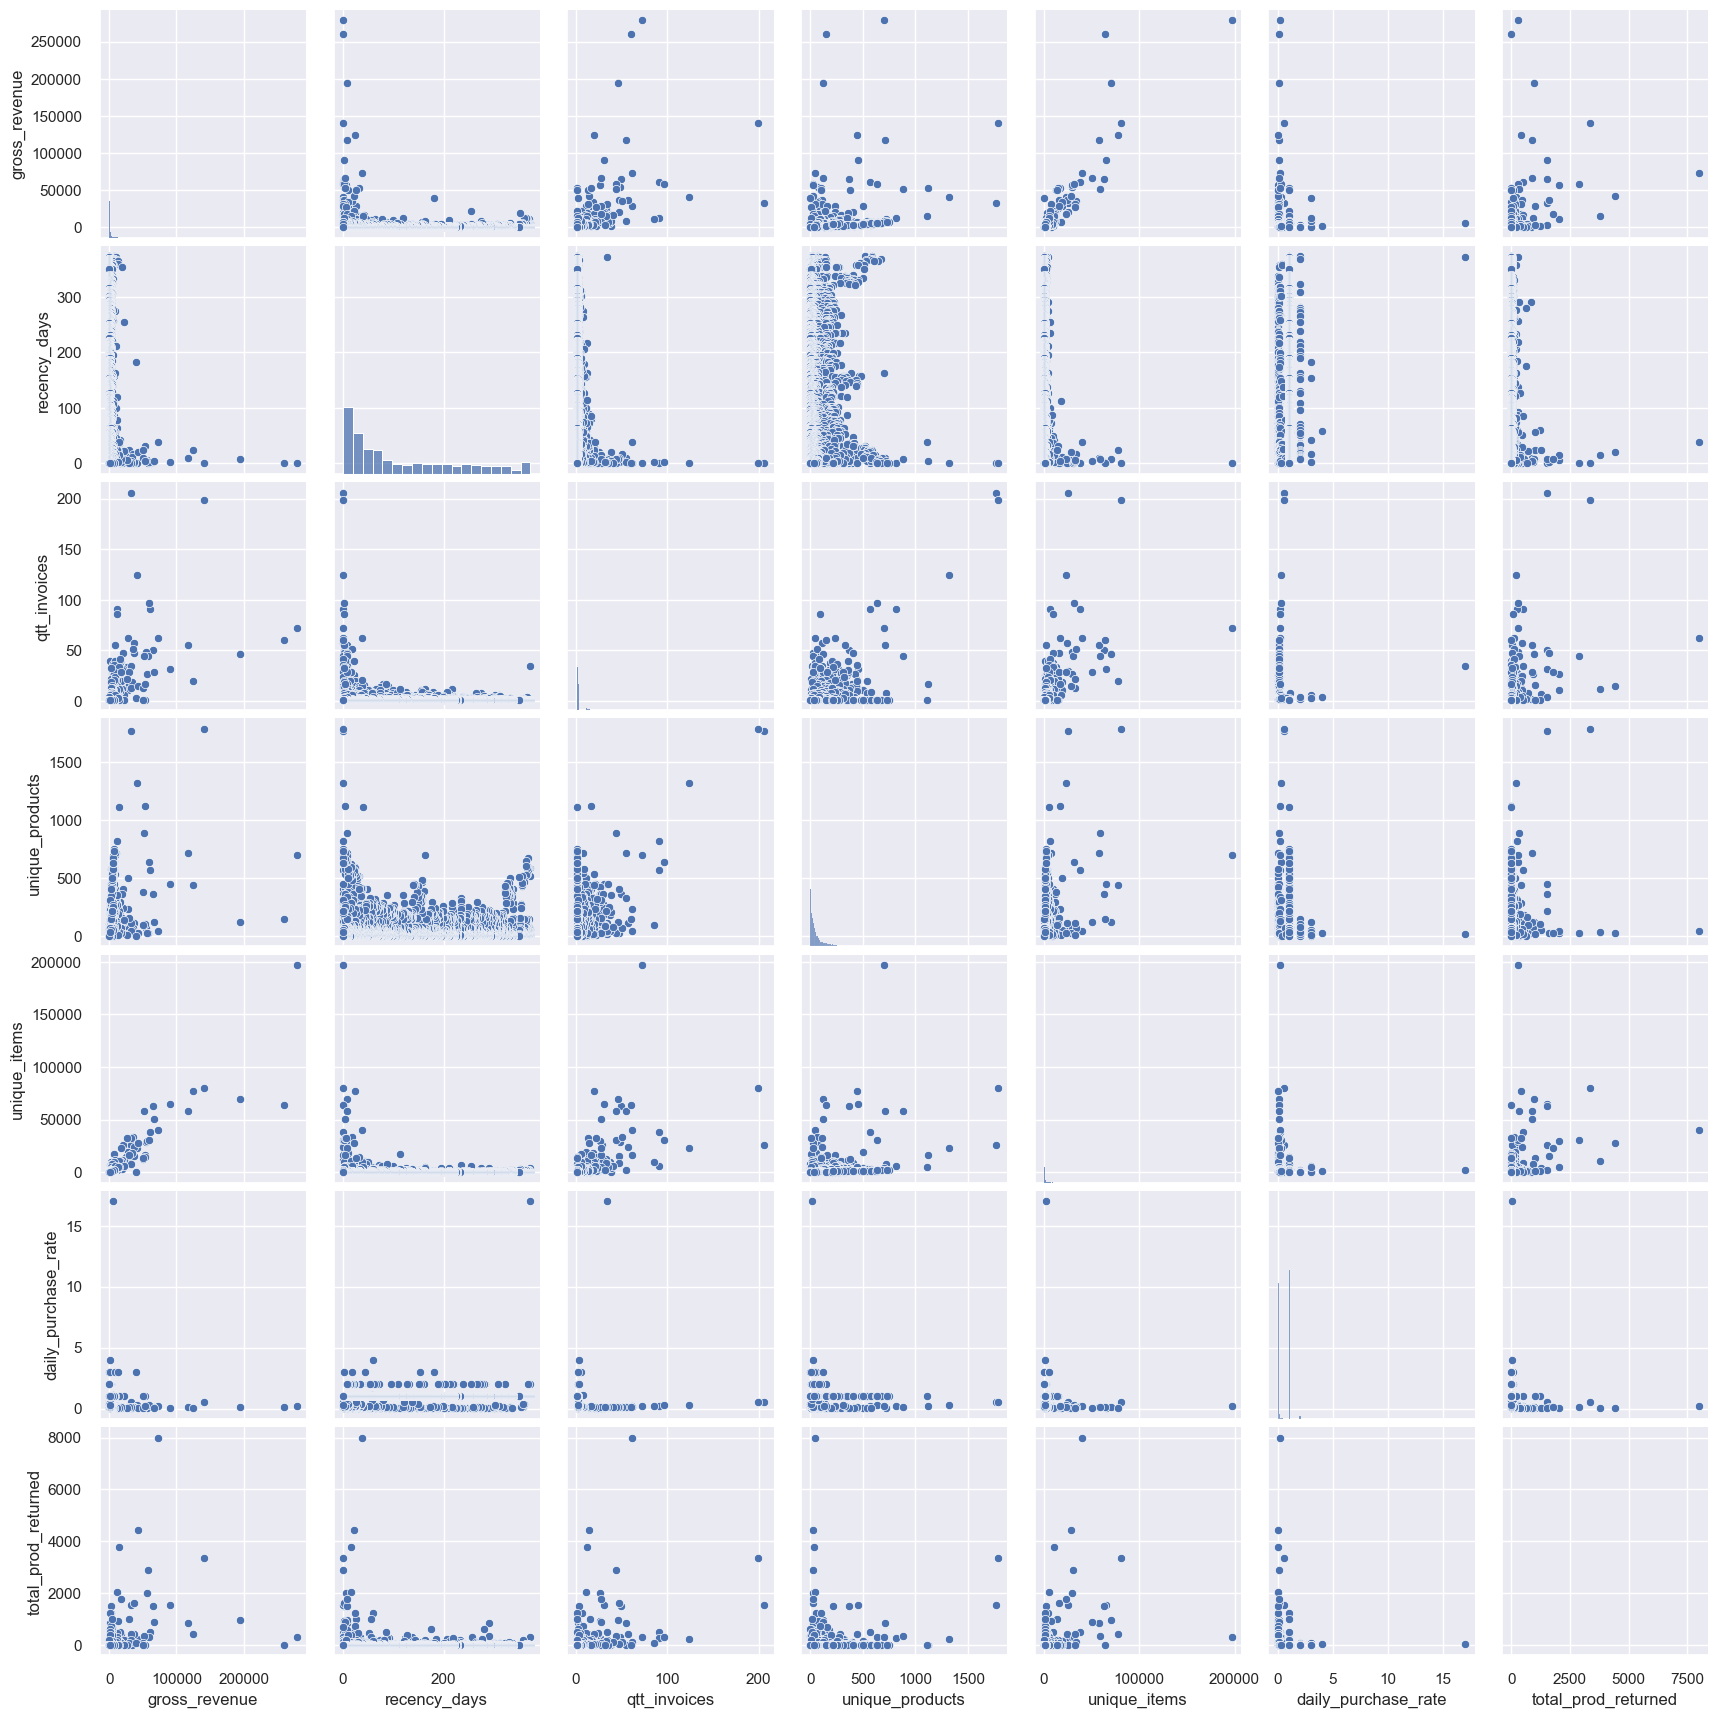

In [151]:
sns.pairplot(df4_biv)

In [152]:
df4_biv.columns

Index(['gross_revenue', 'recency_days', 'qtt_invoices', 'unique_products',
       'unique_items', 'daily_purchase_rate', 'total_prod_returned'],
      dtype='object')

In [153]:
#evaluations from 2D plot
biv_analysis = [['Feature', 'Variance'],
        ['gross_revenue', 'ok'],
        ['recency_days', 'ok'],
        ['qtt_invoices', 'ok'],
        ['unique_products', 'ok'],
        ['unique_items', 'ok'],
        ['daily_purchase_rate', 'low'],
        ['total_prod_returned', 'ok'],
 
      ]
print(tabulate(biv_analysis, headers='firstrow', stralign='left', tablefmt='simple'))
#daily_purchase_rate has few variation, even when combined with other features. 
#So, removing it, probably the clustering will improve, because we won't have this dimension anymore

Feature              Variance
-------------------  ----------
gross_revenue        ok
recency_days         ok
qtt_invoices         ok
unique_products      ok
unique_items         ok
daily_purchase_rate  low
total_prod_returned  ok


# Data Preparation

In [154]:
df5 = df4.copy()
df5.to_csv("../data/interim/cycle8/df5_eda_uni_bi_done.csv")

In [155]:
#test each variable to define wich is the best standardization or reescaling
mm = pp.MinMaxScaler()
ss = pp.StandardScaler()
rs = pp.RobustScaler()

df5['gross_revenue'] = mm.fit_transform(df5[['gross_revenue']])
df5['recency_days'] = mm.fit_transform(df5[['recency_days']])
df5['qtt_invoices'] = mm.fit_transform(df5[['qtt_invoices']])
df5['unique_products'] = mm.fit_transform(df5[['unique_products']])
df5['unique_items'] = mm.fit_transform(df5[['unique_items']])
df5['daily_purchase_rate'] = mm.fit_transform(df5[['daily_purchase_rate']])
df5['total_prod_returned'] = mm.fit_transform(df5[['total_prod_returned']])

In [156]:
#after transformations:
df5.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate,total_prod_returned
0,17850,0.019312,0.997319,0.160976,0.011204,0.008799,1.000000,0.004998
1,13047,0.011579,0.150134,0.039024,0.058263,0.007056,0.001345,0.004373
2,12583,0.024020,0.005362,0.068293,0.063305,0.025538,0.002052,0.006247
3,13748,0.003396,0.254692,0.019512,0.012885,0.002225,0.000734,0.000000
4,15100,0.003137,0.892761,0.009756,0.000000,0.000401,0.003985,0.002749


# Feature Selection

In [157]:
df6 = df5.copy()
df6.to_csv("../data/interim/cycle8/df6_data_prep_done.csv")

## Variable Space

In [158]:
#select features for variable space

#drop customer_id
selected_features_vs =['gross_revenue','recency_days','unique_products','daily_purchase_rate','total_prod_returned'] #5
X_vs = df6[selected_features_vs].copy()
X_vs.head()

,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned
0,0.019312,0.997319,0.011204,1.000000,0.004998
1,0.011579,0.150134,0.058263,0.001345,0.004373
2,0.024020,0.005362,0.063305,0.002052,0.006247
3,0.003396,0.254692,0.012885,0.000734,0.000000
4,0.003137,0.892761,0.000000,0.003985,0.002749


In [159]:
#variance
for col in X_vs.columns:
    print (f"Variance of {col}: { round(sta.variance(df5[col]) ,3) } ")

Variance of gross_revenue: 0.001 
Variance of recency_days: 0.09 
Variance of unique_products: 0.003 
Variance of daily_purchase_rate: 0.001 
Variance of total_prod_returned: 0.0 


In [160]:
#let's then go to Hyperparameter Fine-Tuning -> Variable Space, to check the performance with SS with this origainal variable space.

## Embedding Space

In [181]:
#select features for variable space

#drop customer_id
X = df6.drop('customer_id', axis=1).copy()
X.head()

,gross_revenue,recency_days,qtt_invoices,unique_products,unique_items,daily_purchase_rate,total_prod_returned
0,0.019312,0.997319,0.160976,0.011204,0.008799,1.000000,0.004998
1,0.011579,0.150134,0.039024,0.058263,0.007056,0.001345,0.004373
2,0.024020,0.005362,0.068293,0.063305,0.025538,0.002052,0.006247
3,0.003396,0.254692,0.019512,0.012885,0.002225,0.000734,0.000000
4,0.003137,0.892761,0.009756,0.000000,0.000401,0.003985,0.002749


In [182]:
#select features
selected_features = ['gross_revenue','recency_days','unique_products','daily_purchase_rate','total_prod_returned'] #5

X = X[selected_features].copy()
X.head()

,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned
0,0.019312,0.997319,0.011204,1.000000,0.004998
1,0.011579,0.150134,0.058263,0.001345,0.004373
2,0.024020,0.005362,0.063305,0.002052,0.006247
3,0.003396,0.254692,0.012885,0.000734,0.000000
4,0.003137,0.892761,0.000000,0.003985,0.002749


# EDA - Data Space Study

In [1364]:
#as soon as data on original space is not organized, let's look for a better data space with embedding

In [183]:
X.head()

,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned
0,0.019312,0.997319,0.011204,1.000000,0.004998
1,0.011579,0.150134,0.058263,0.001345,0.004373
2,0.024020,0.005362,0.063305,0.002052,0.006247
3,0.003396,0.254692,0.012885,0.000734,0.000000
4,0.003137,0.892761,0.000000,0.003985,0.002749


### PCA

In [184]:
#PCA helps to see which are the main components, with the greatest variation of data

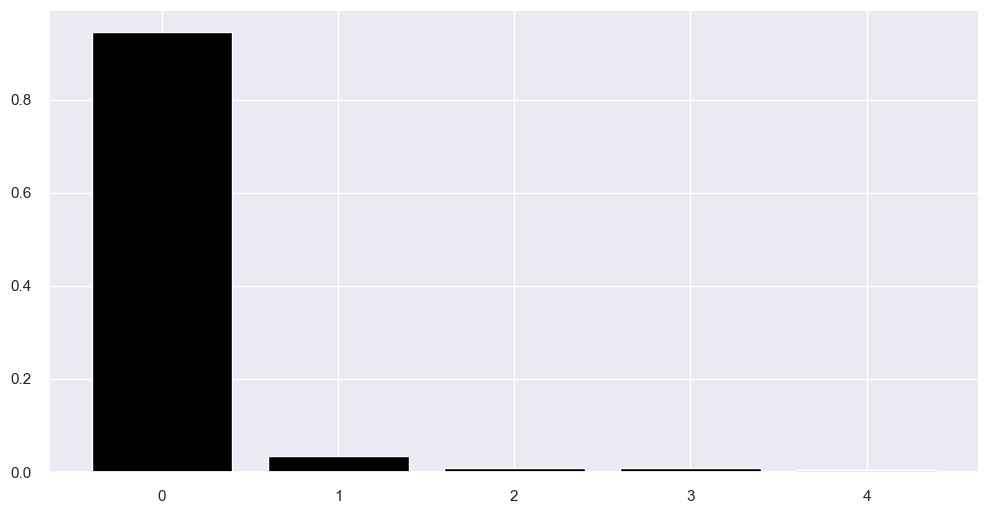

In [185]:
#define number of features on space
pca = dd.PCA (n_components=X.shape[1])

principal_components = pca.fit_transform( X )

#plot explianed variables (variance of the main components)
#x axis
features = range(pca.n_components_)
#y axis
plt.bar(features, pca.explained_variance_ratio_, color='black')

#pca_component
df_pca = pd.DataFrame(principal_components)

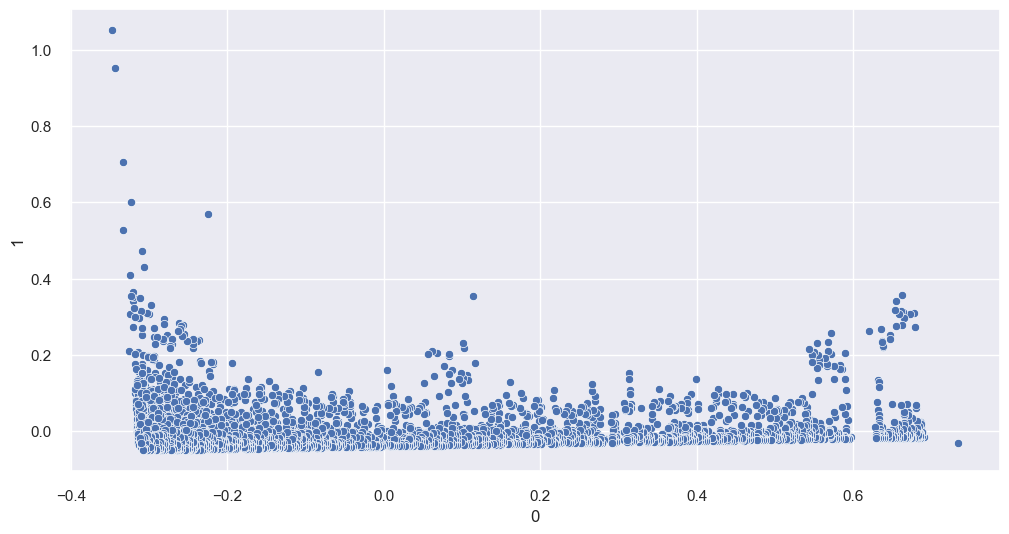

In [186]:
#plot scatterplot with 0 and 1 (2 with > variation)
sns.scatterplot(x=0, y=1, data=df_pca);
#there is no clear division, let's keep going.

### UMAP

In [187]:
#UMAP basically takes a dataset in a very high dimension and returns a new dataset with the same number of samples in a space of much lower dimension than the original dimension.
#UMAP is good for a lot of data because it's faster, but it's not as verbose in visualization.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

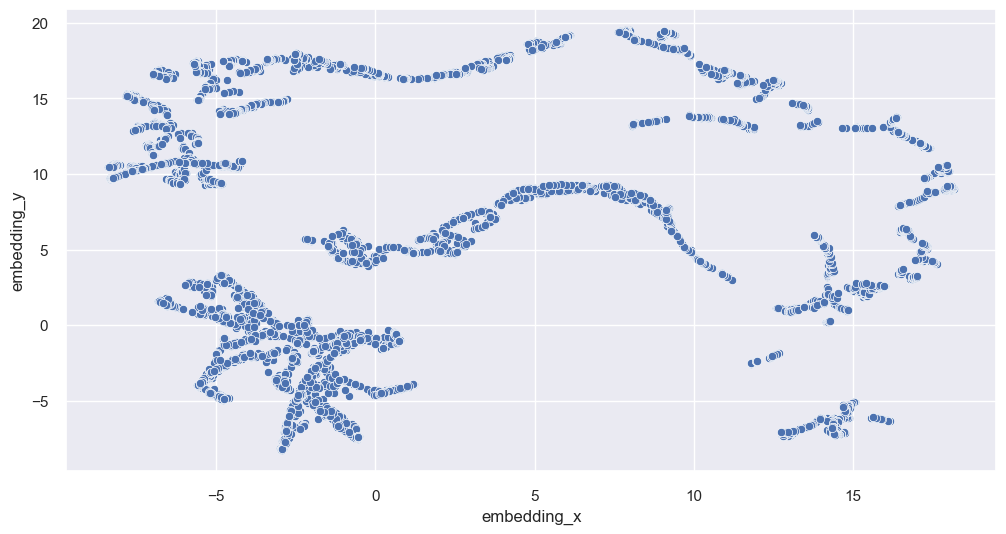

In [188]:
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( X )
df_umap = pd.DataFrame()
df_umap['embedding_x'] = embedding[:, 0]
df_umap['embedding_y'] = embedding[:, 1]
sns.scatterplot( x='embedding_x', y='embedding_y', data=df_umap )

### t-SNE

In [189]:
#t-SNE also designs a new embedding space in low dimensionality, aiming to organize the data.
#It's good for smaller datasets as it's more accurate, but slower for larger datasets.

/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


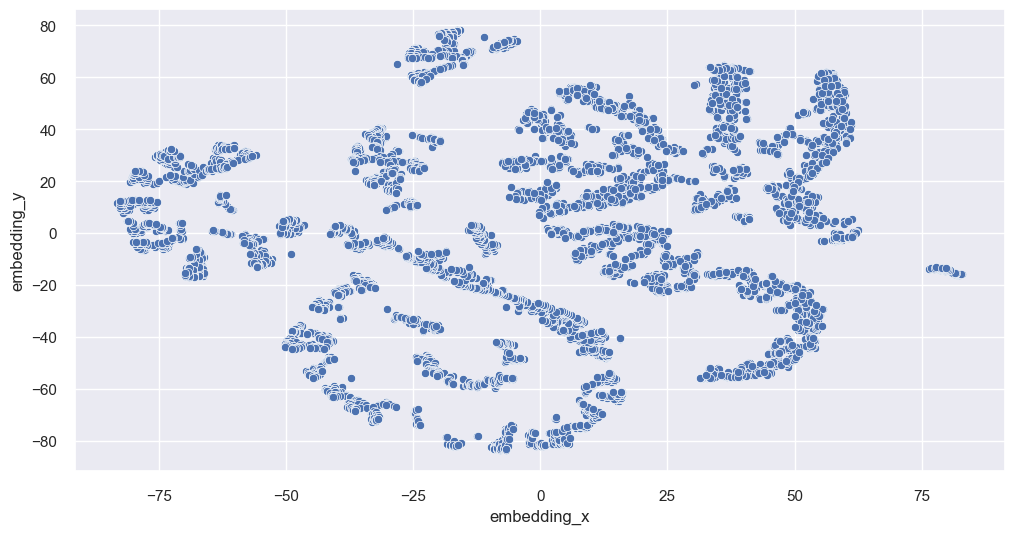

In [190]:
reducer = mn.TSNE( n_components=2, n_jobs=-1, random_state=42 ) #can user different n_components, try it!
embedding = reducer.fit_transform( X )
df_tsne = pd.DataFrame()
df_tsne['embedding_x'] = embedding[:, 0]
df_tsne['embedding_y'] = embedding[:, 1]
sns.scatterplot( x='embedding_x', y='embedding_y', data=df_tsne );

### Tree-Based Embedding

In [191]:
#natural path, using prepared data to generate Tree-Based Embedding

In [192]:
X.head()

,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned
0,0.019312,0.997319,0.011204,1.000000,0.004998
1,0.011579,0.150134,0.058263,0.001345,0.004373
2,0.024020,0.005362,0.063305,0.002052,0.006247
3,0.003396,0.254692,0.012885,0.000734,0.000000
4,0.003137,0.892761,0.000000,0.003985,0.002749


In [193]:
#regression: 
#training dataset 
X_prep = X.drop(columns=['gross_revenue'], axis=1)
y_prep = X['gross_revenue']

#model definition
rf_model_prep = en.RandomForestRegressor(n_estimators=100, random_state=42)
    #experience: stick with 100 estimators, 500, 2k or 5k wont'change almost nothing at SS. Instead, select other features and clean data.

#model trainig
rf_model_prep.fit(X_prep,y_prep)

RandomForestRegressor(random_state=42)

In [194]:
#get leaves
df_leaf_prep = pd.DataFrame ( rf_model_prep.apply( X_prep ) )

In [195]:
#show leaves (new data space)
df_leaf_prep

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,3805,5230,5302,4129,4109,4381,5298,5282,4783,6965,4993,5191,6836,4838,4653,...,4071,4643,4837,6860,4813,5350,5248,4736,4767,5226,5206,6944,5232,4930,4884
1,6188,6526,6792,6747,6742,6189,6847,6652,6255,6242,6578,6648,6663,6397,6395,...,6732,6203,6758,6753,6517,6790,6814,6569,6459,6577,6702,6768,6787,6312,6616
2,6743,6676,6826,6762,6796,6882,6777,6739,6878,6745,6916,6706,6688,6828,6376,...,6791,6749,6787,6304,6723,6836,6783,6616,6510,6649,6765,6571,6830,6873,6882
3,796,782,1384,791,822,1279,757,918,813,970,1132,1046,938,519,1169,...,950,282,886,1001,509,1040,984,991,1124,512,910,838,687,675,708
4,1938,1640,1848,1435,956,1624,1449,1412,1455,1627,1430,1674,1605,1981,1658,...,1256,1299,1978,6566,1981,2306,2207,1410,1889,2219,1324,1366,1490,1891,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5688,6519,6332,6624,6699,6672,6547,6484,6585,6597,6555,6448,6437,6300,6522,6588,...,6577,6489,6693,6210,6380,6374,6655,6414,6247,6503,6648,6406,6356,6652,6674
5689,4812,5382,6994,6713,5307,52,6940,6941,6958,6557,5306,5314,50,34,6942,...,6585,6928,4869,6228,6970,5370,6664,6433,6254,6534,42,6526,6983,4969,7047
5690,4457,4655,4981,4164,4928,50,5000,4945,4432,4391,5005,4867,49,33,47,...,4077,4347,4583,2839,4598,5010,4905,4408,4524,4861,41,4201,4265,4689,35
5691,4812,5382,5317,5512,5306,51,5321,5767,5262,4931,5306,5309,50,34,47,...,5687,4667,4868,4890,5447,5370,5700,4790,5531,5478,41,4374,5299,4968,35


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

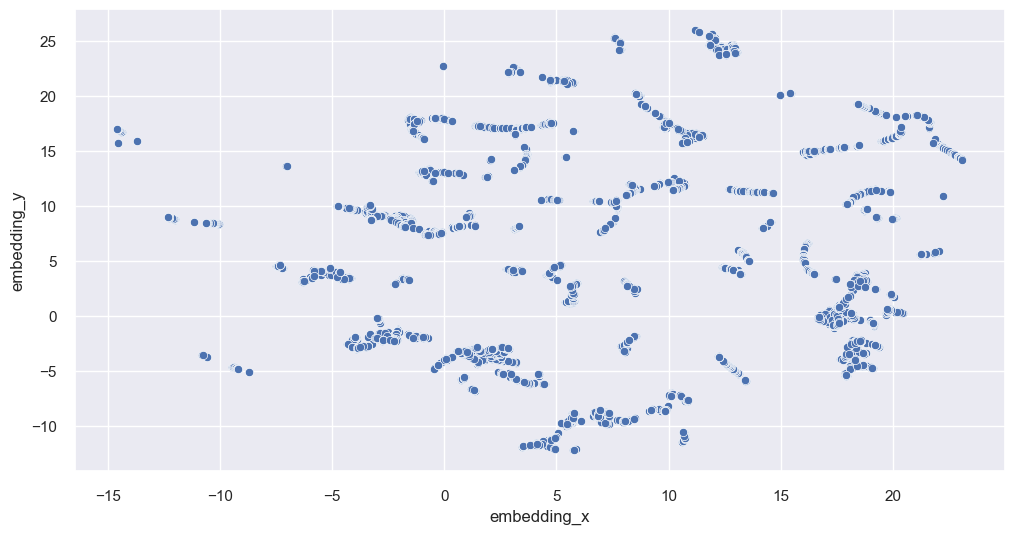

In [196]:
#n_estimators= 100, 5 features: ['gross_revenue','recency_days','unique_products','daily_purchase_rate','total_prod_returned']

#reduce dimensionality from 10 to 2
reducer_prep = umap.UMAP( random_state=42 )
embedding_prep = reducer_prep.fit_transform( df_leaf_prep )

#embedding (projection of 1000 dimensions on 2)
df_tree_prep = pd.DataFrame()
df_tree_prep['embedding_x'] = embedding_prep[:, 0]
df_tree_prep['embedding_y'] = embedding_prep[:, 1] #could reduce to more estimators, maybe 5.. try it!
sns.scatterplot( x='embedding_x', y='embedding_y', data=df_tree_prep )

In [198]:
#Let's now compare UMAP, T-SNE and Tree-Based Embedding on Hyp Fine Tuning -> Embedding space, and decide which is the best space.

# Hyperparameter Fine-Tuning

In [161]:
#Silhouette Score (SS) will be the performance metric, since can be used to all the models we will use.

## Variable space

In [162]:
#data prepared from Feature Selection -> Variable Sapce
X_vs.head()

,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned
0,0.019312,0.997319,0.011204,1.000000,0.004998
1,0.011579,0.150134,0.058263,0.001345,0.004373
2,0.024020,0.005362,0.063305,0.002052,0.006247
3,0.003396,0.254692,0.012885,0.000734,0.000000
4,0.003137,0.892761,0.000000,0.003985,0.002749


In [163]:
#set number of clusters
clusters_vs = np.arange(2,13,1)
clusters_vs

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### K-Means

In [164]:
kmeans_list_vs = []
for k in clusters_vs:
    #model definition
    kmeans_model_vs = c.KMeans( n_clusters=k, n_init=100, random_state=42 )#P.S: use always this 2 parameters: n_init=300, random_state=42, or when running again, values of clustering will change.

    #model training
    kmeans_model_vs.fit(X_vs)

    #Model predict
    kmeans_labels_vs = kmeans_model_vs.predict(X_vs)
        #EX: array([ 4,  2, 14, ...,  9, 14,  9], dtype=int32)
        
   #model perfomance (SS)
    kmeans_ss_vs = m.silhouette_score(X_vs, kmeans_labels_vs, metric='euclidean')
    kmeans_list_vs.append(kmeans_ss_vs)
        #EX: [0.657967592710707, 0.5812799344036761..]

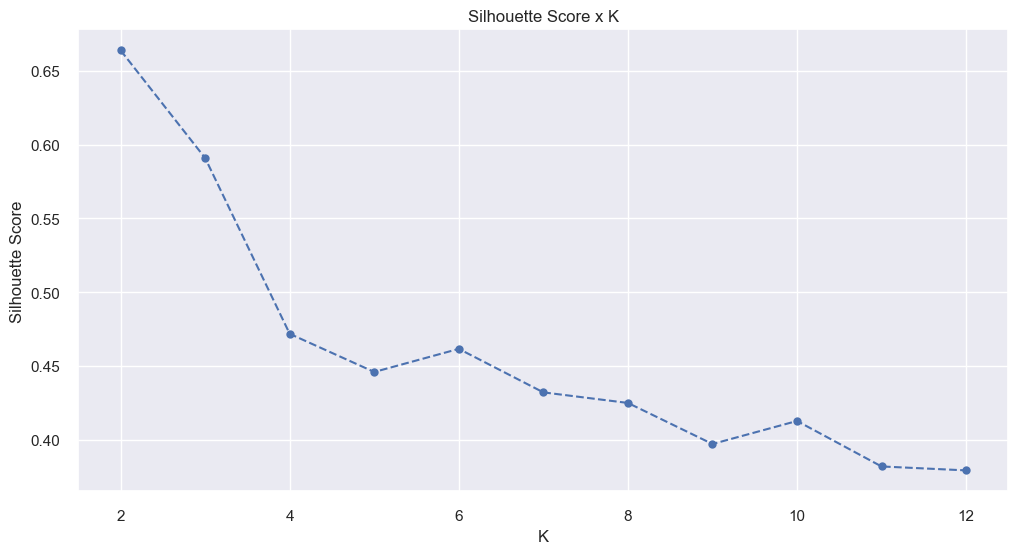

In [165]:
#Silhouette Score
plt.plot(clusters_vs, kmeans_list_vs, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

### Gaussian Mixture Model

In [166]:
gmm_list_vs = []
for k in clusters_vs:
    #model definition
    gmm_model_vs = mx.GaussianMixture(n_components=k, n_init=10, random_state=42) #P.S: use always this 2 parameters: n_init=300, random_state=42, or when running again, values of clustering will change.

    #model training
    gmm_model_vs.fit(X_vs)

    #model predict
    gmm_labels_vs = gmm_model_vs.predict(X_vs)

    #model perfomance (SS)
    gmm_ss_vs = m.silhouette_score(X_vs, gmm_labels_vs, metric='euclidean')
    gmm_list_vs.append(gmm_ss_vs)

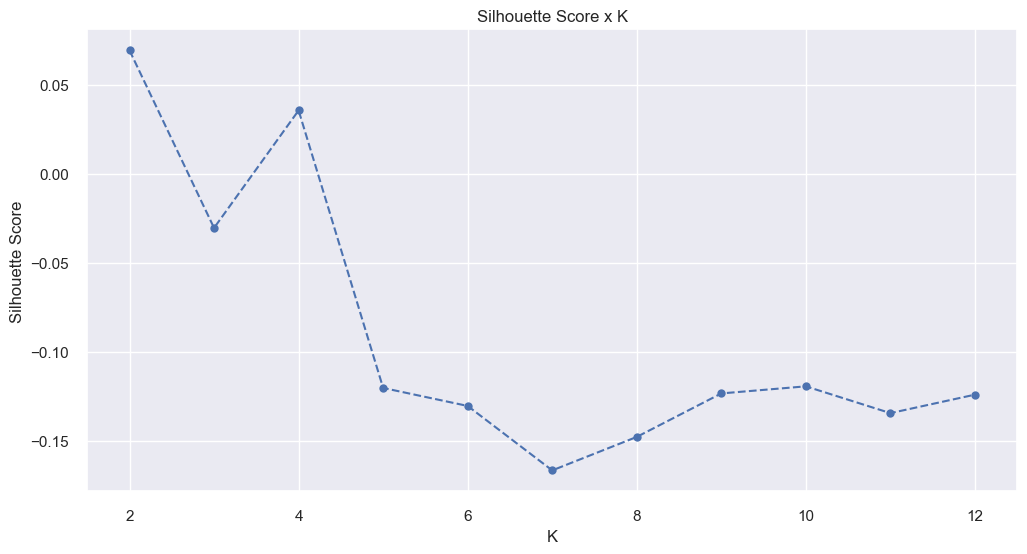

In [167]:
#Silhouette Score
plt.plot(clusters_vs, gmm_list_vs, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

### Hierarchical Clustering

In [168]:
#let's use scipy instead of sklearn, being a simpler implementation.
hc_list_vs = []
for k in clusters_vs:
    #model definition and training
    hc_model_vs = hc.linkage(X_vs, 'ward')

    #model predict
    hc_labels_vs = hc.fcluster(hc_model_vs, k, criterion='maxclust')#to cut dendrogram

    #model perfomance (SS)
    hc_ss_vs = m.silhouette_score(X_vs, hc_labels_vs, metric='euclidean')
    hc_list_vs.append(hc_ss_vs) 

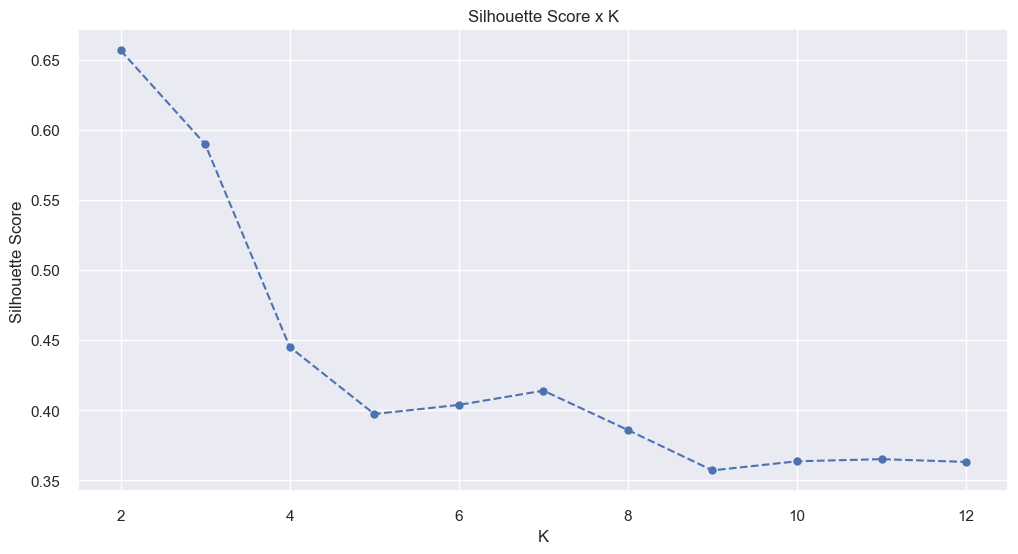

In [169]:
#Silhouette Score
plt.plot(clusters_vs, hc_list_vs, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

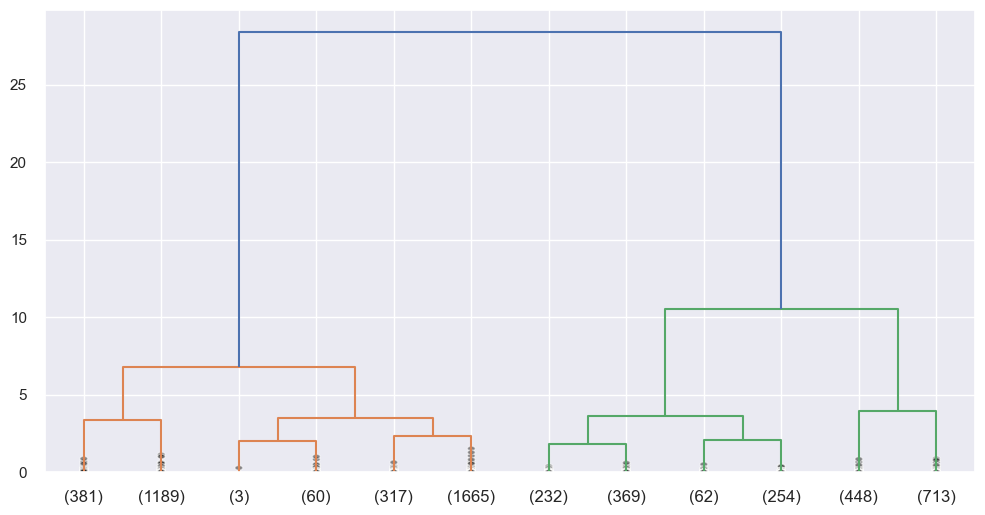

In [170]:
#truncated dendrogram
hc.dendrogram(
    hc_model_vs,
    #leaf_rotation=90,
    #leaf_font_size=8,
    truncate_mode='lastp',#take out for complete (heavy)
    p=12, #truncate after 12 
    show_contracted=True
)
plt.plot();

### DBScan

In [171]:
#parameters
eps=0.8 #radius
min_samples=10 #density

#model definition
dbscan_model_vs = c.DBSCAN( eps=eps, min_samples=min_samples)

#model training & predict
dbscan_labels_vs = dbscan_model_vs.fit_predict(X_vs)

#model perfomance (SS)
dbscan_ss_vs = m.silhouette_score(X_vs, dbscan_labels_vs, metric='euclidean')

print(f'SS: {dbscan_ss_vs}')
print(f'Number of clusters: {len(np.unique(dbscan_labels_vs))}')
print(f'Clusters: {np.unique(dbscan_labels_vs)}')

SS: 0.6979766620104426
Number of clusters: 2
Clusters: [-1  0]


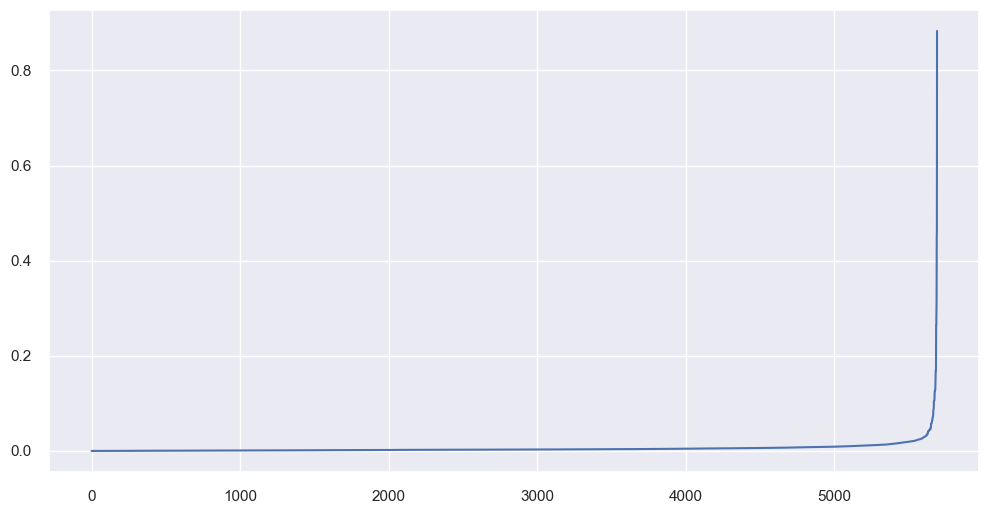

In [172]:
#find best number of eps and min_samples:
neighbors_vs = NearestNeighbors( n_neighbors=min_samples).fit(X_vs)
nn_distances_vs, nn_indexes_vs = neighbors_vs.kneighbors(X_vs)
#sort asc
nn_distances_vs = np.sort(nn_distances_vs, axis=0)
#get just first columns, cause being a matrix, I have the distance to all point 
nn_distances_vs = nn_distances_vs[:,1]
#plot
plt.plot(nn_distances_vs);
# => eps sugested = 0.1 (at elbow)

In [173]:
#data is too messy (homogeneous), and DBScan tends to consider everything as a single cluster, or everything as outlier. Let's not consider it by now.

### Results with variable space

In [174]:
#cycle 8 with variable space
df_results_vs = pd.DataFrame({'K-Means':kmeans_list_vs, 'GMM':gmm_list_vs, 'HC':hc_list_vs}).T
df_results_vs.columns = clusters_vs
#highlight best cluster per algorithm according to SS 
df_results_vs.style.highlight_max(color='green', axis=1)

,2,3,4,5,6,7,8,9,10,11,12
K-Means,0.663910,0.590863,0.471688,0.445824,0.461500,0.432001,0.424832,0.396993,0.412609,0.381759,0.379095
GMM,0.069444,-0.030287,0.035714,-0.120171,-0.130284,-0.166481,-0.147676,-0.123247,-0.119264,-0.134318,-0.123937
HC,0.656577,0.589646,0.445019,0.397217,0.403717,0.413879,0.385794,0.356996,0.363491,0.365012,0.363032


In [179]:
#For 8-10 k (good for business), K-Means and HC are low, and GMM and DBScan weren't able to perform in our original variable space.
#as long as we haven't found a good performance, let's check Embedding Space.
#let's go back to Feature Selection -> Embedding Space, to build it.

## Embedding space

In [ ]:
#for each space (df_umap, df_tsne and df_tree_prep), get proper X_em and run K-Means, KNN and HC, and complete results table.

In [233]:
#embedding from UMAP (first run)
X_em = df_umap.copy()
df_umap.head()

,embedding_x,embedding_y
0,15.686619,-6.099525
1,-0.614432,4.606266
2,-1.989648,-3.996645
3,3.698180,7.299434
4,11.212939,2.988281


In [213]:
#embedding from T-SNE (second run)
X_em = df_tsne.copy()
df_tsne.head()

,embedding_x,embedding_y
0,-11.086872,75.661484
1,17.283327,-0.701119
2,53.220879,33.171448
3,41.702259,-15.813789
4,-25.125858,37.929573


In [222]:
#Tree-based embedding (third run)
X_em = df_tree_prep.copy()
df_tree_prep.head()

,embedding_x,embedding_y
0,10.724830,15.726498
1,5.426398,-10.020749
2,4.914887,-12.044471
3,17.074522,-0.585212
4,9.787044,17.145290


In [234]:
#set number of clusters
clusters_em = np.arange(2,13,1)
clusters_em

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### K-Means

In [235]:
kmeans_list = []
for k in clusters_em:
    #model definition
    kmeans_model = c.KMeans( n_clusters=k, n_init=100, random_state=42 )#P.S: use always this 2 parameters: n_init=300, random_state=42, or when running again, values of clustering will change.

    #model training
    kmeans_model.fit(X_em)

    #Model predict
    kmeans_labels = kmeans_model.predict(X_em)
    #labels: array([1, 5, 5, ..., 5, 3, 5], dtype=int32)
        
   #model perfomance (SS)
    kmeans_ss = m.silhouette_score(X_em, kmeans_labels, metric='euclidean')
    kmeans_list.append(kmeans_ss)

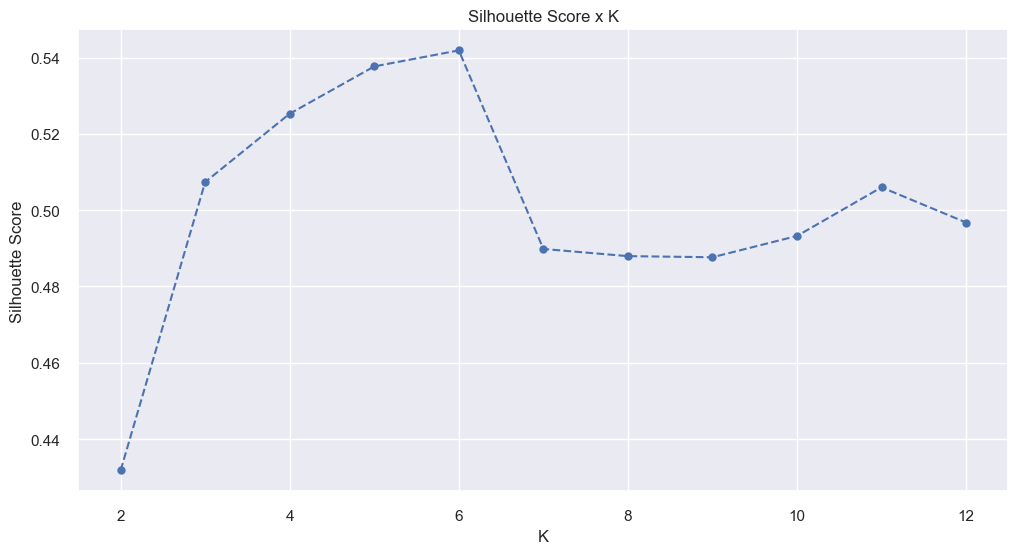

In [236]:
#Silhouette Score 
#n_estimators= 100, 5 features: ['gross_revenue','recency_days','unique_products','daily_purchase_rate','total_prod_returned']
plt.plot(clusters_em, kmeans_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

#tried also with non-scaled embedding space, but got almost the same results. 
#improvements can be done on next cycles on features, data cleaning or new parameters for tree-based embedding.

### Gaussian Mixture Model

In [237]:
gmm_list = []
for k in clusters_em:
    #model definition
    gmm_model = mx.GaussianMixture(n_components=k, n_init=10, random_state=42 )#P.S: use always this 2 parameters: n_init=300, random_state=42, or when running again, values of clustering will change.

    #model training
    gmm_model.fit(X_em)

    #model predict
    gmm_labels = gmm_model.predict(X_em)

    #model perfomance (SS)
    gmm_ss = m.silhouette_score(X_em, gmm_labels, metric='euclidean')
    gmm_list.append(gmm_ss)

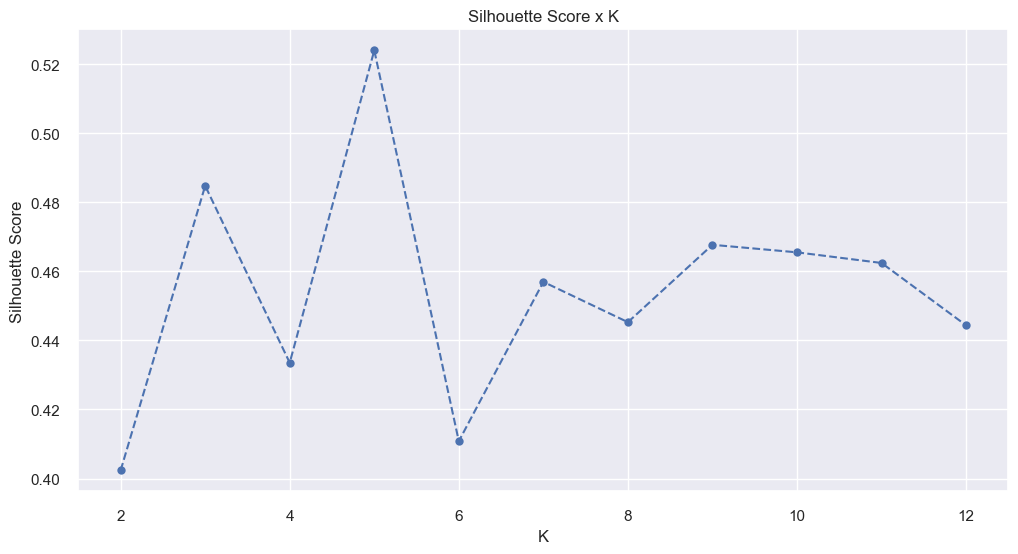

In [238]:
#Silhouette Score (with tree-based embedding from scaled dataset)
plt.plot(clusters_em, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

### Hierarchical Clustering

In [239]:
#let's use scipy instead of sklearn, being a simpler implementation.
hc_list = []
for k in clusters_em:
    #model definition and training
    hc_model = hc.linkage(X_em, 'ward')

    #model predict
    hc_labels = hc.fcluster(hc_model, k, criterion='maxclust')#to cut dendrogram

    #model perfomance (SS)
    hc_ss = m.silhouette_score(X_em, hc_labels, metric='euclidean')
    hc_list.append(hc_ss) 

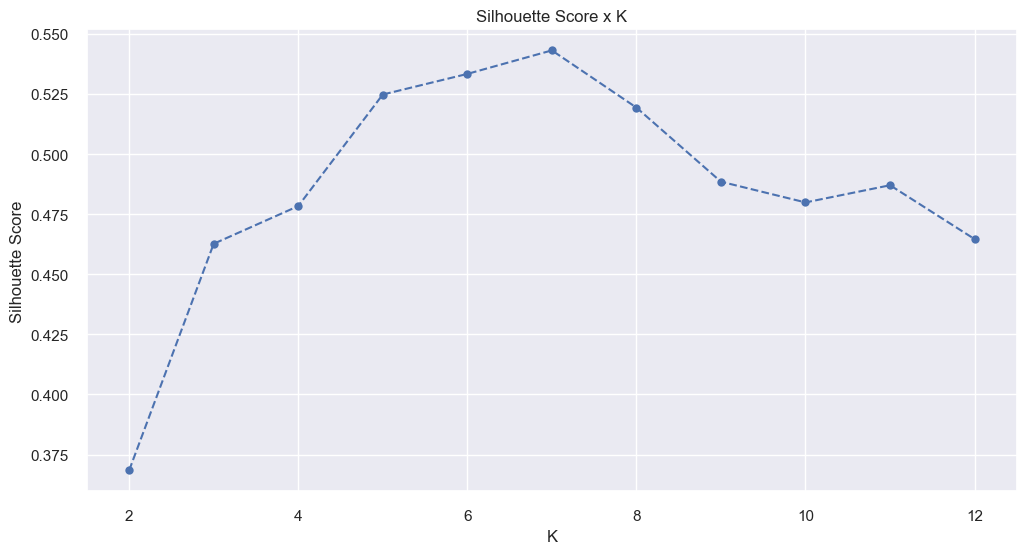

In [240]:
#Silhouette Score (with tree-based embedding from not scaled dataset)
plt.plot(clusters_em, hc_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

### Results with Embedding Spaces

#### Results Umap

In [241]:
df_results_em = pd.DataFrame({'K-Means':kmeans_list, 'GMM':gmm_list, 'HC':hc_list}).T
df_results_em.columns = clusters_em
#highlight best cluster per algorithm according to SS 
df_results_em.style.highlight_max(color='green', axis=1)

,2,3,4,5,6,7,8,9,10,11,12
K-Means,0.431814,0.507368,0.525280,0.537666,0.541867,0.489836,0.487956,0.487664,0.493241,0.505987,0.496768
GMM,0.402363,0.484772,0.433529,0.523983,0.410814,0.456954,0.445279,0.467686,0.465505,0.462425,0.444371
HC,0.368404,0.462684,0.478357,0.524772,0.533349,0.543137,0.519347,0.488504,0.479886,0.487032,0.464630


#### Results T-SNE 

In [221]:
df_results_em = pd.DataFrame({'K-Means':kmeans_list, 'GMM':gmm_list, 'HC':hc_list}).T
df_results_em.columns = clusters_em
#highlight best cluster per algorithm according to SS 
df_results_em.style.highlight_max(color='green', axis=1)

,2,3,4,5,6,7,8,9,10,11,12
K-Means,0.383609,0.410314,0.396524,0.388303,0.409708,0.401537,0.403963,0.415902,0.428636,0.435008,0.442640
GMM,0.380751,0.396114,0.349603,0.374351,0.278821,0.310812,0.246367,0.328394,0.371596,0.327461,0.349251
HC,0.335552,0.378758,0.379143,0.354173,0.351309,0.372842,0.379369,0.388975,0.391494,0.397228,0.392640


#### Results Tree-based embedding

In [230]:
df_results_em = pd.DataFrame({'K-Means':kmeans_list, 'GMM':gmm_list, 'HC':hc_list}).T
df_results_em.columns = clusters_em
#highlight best cluster per algorithm according to SS 
df_results_em.style.highlight_max(color='green', axis=1)

,2,3,4,5,6,7,8,9,10,11,12
K-Means,0.401139,0.441576,0.439271,0.423376,0.427368,0.461720,0.478407,0.490731,0.503457,0.488624,0.482442
GMM,0.396034,0.330447,0.351466,0.358300,0.300636,0.323249,0.334896,0.382985,0.315325,0.336935,0.397421
HC,0.366348,0.408750,0.397157,0.389549,0.399323,0.410349,0.437777,0.454163,0.468939,0.482923,0.449638


In [ ]:
#let's keep using Umap embedding space, where on HC with 7k, we've got an SS of 0.54
#8Ks is also a good number of cluster for business team handle actions from them
#run Umap again, to get "df_results_em" updated

# Silhouette Analysis

For a good clustering, we need clusters to have two properties:

- Compactness: smallest possible distance between the points of the same cluster.
- Separation: greatest possible distance between the points of different clusters.

Let's use Silhouette Score (SS) for all algorithms, wich calculates both Compactness and Separation

### Generic Silhouette Analysis

In [243]:
clusters_em

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [255]:
clusters_plot = [3, 4, 5, 6, 7, 8]
clusters_plot

[3, 4, 5, 6, 7, 8]

 For K = 3. Silhouette Score: 0.5896457189194163
 For K = 4. Silhouette Score: 0.4450186293496664
 For K = 5. Silhouette Score: 0.3972167186668352
 For K = 6. Silhouette Score: 0.40371697288088687
 For K = 7. Silhouette Score: 0.4138792224159738
 For K = 8. Silhouette Score: 0.3857936252973545


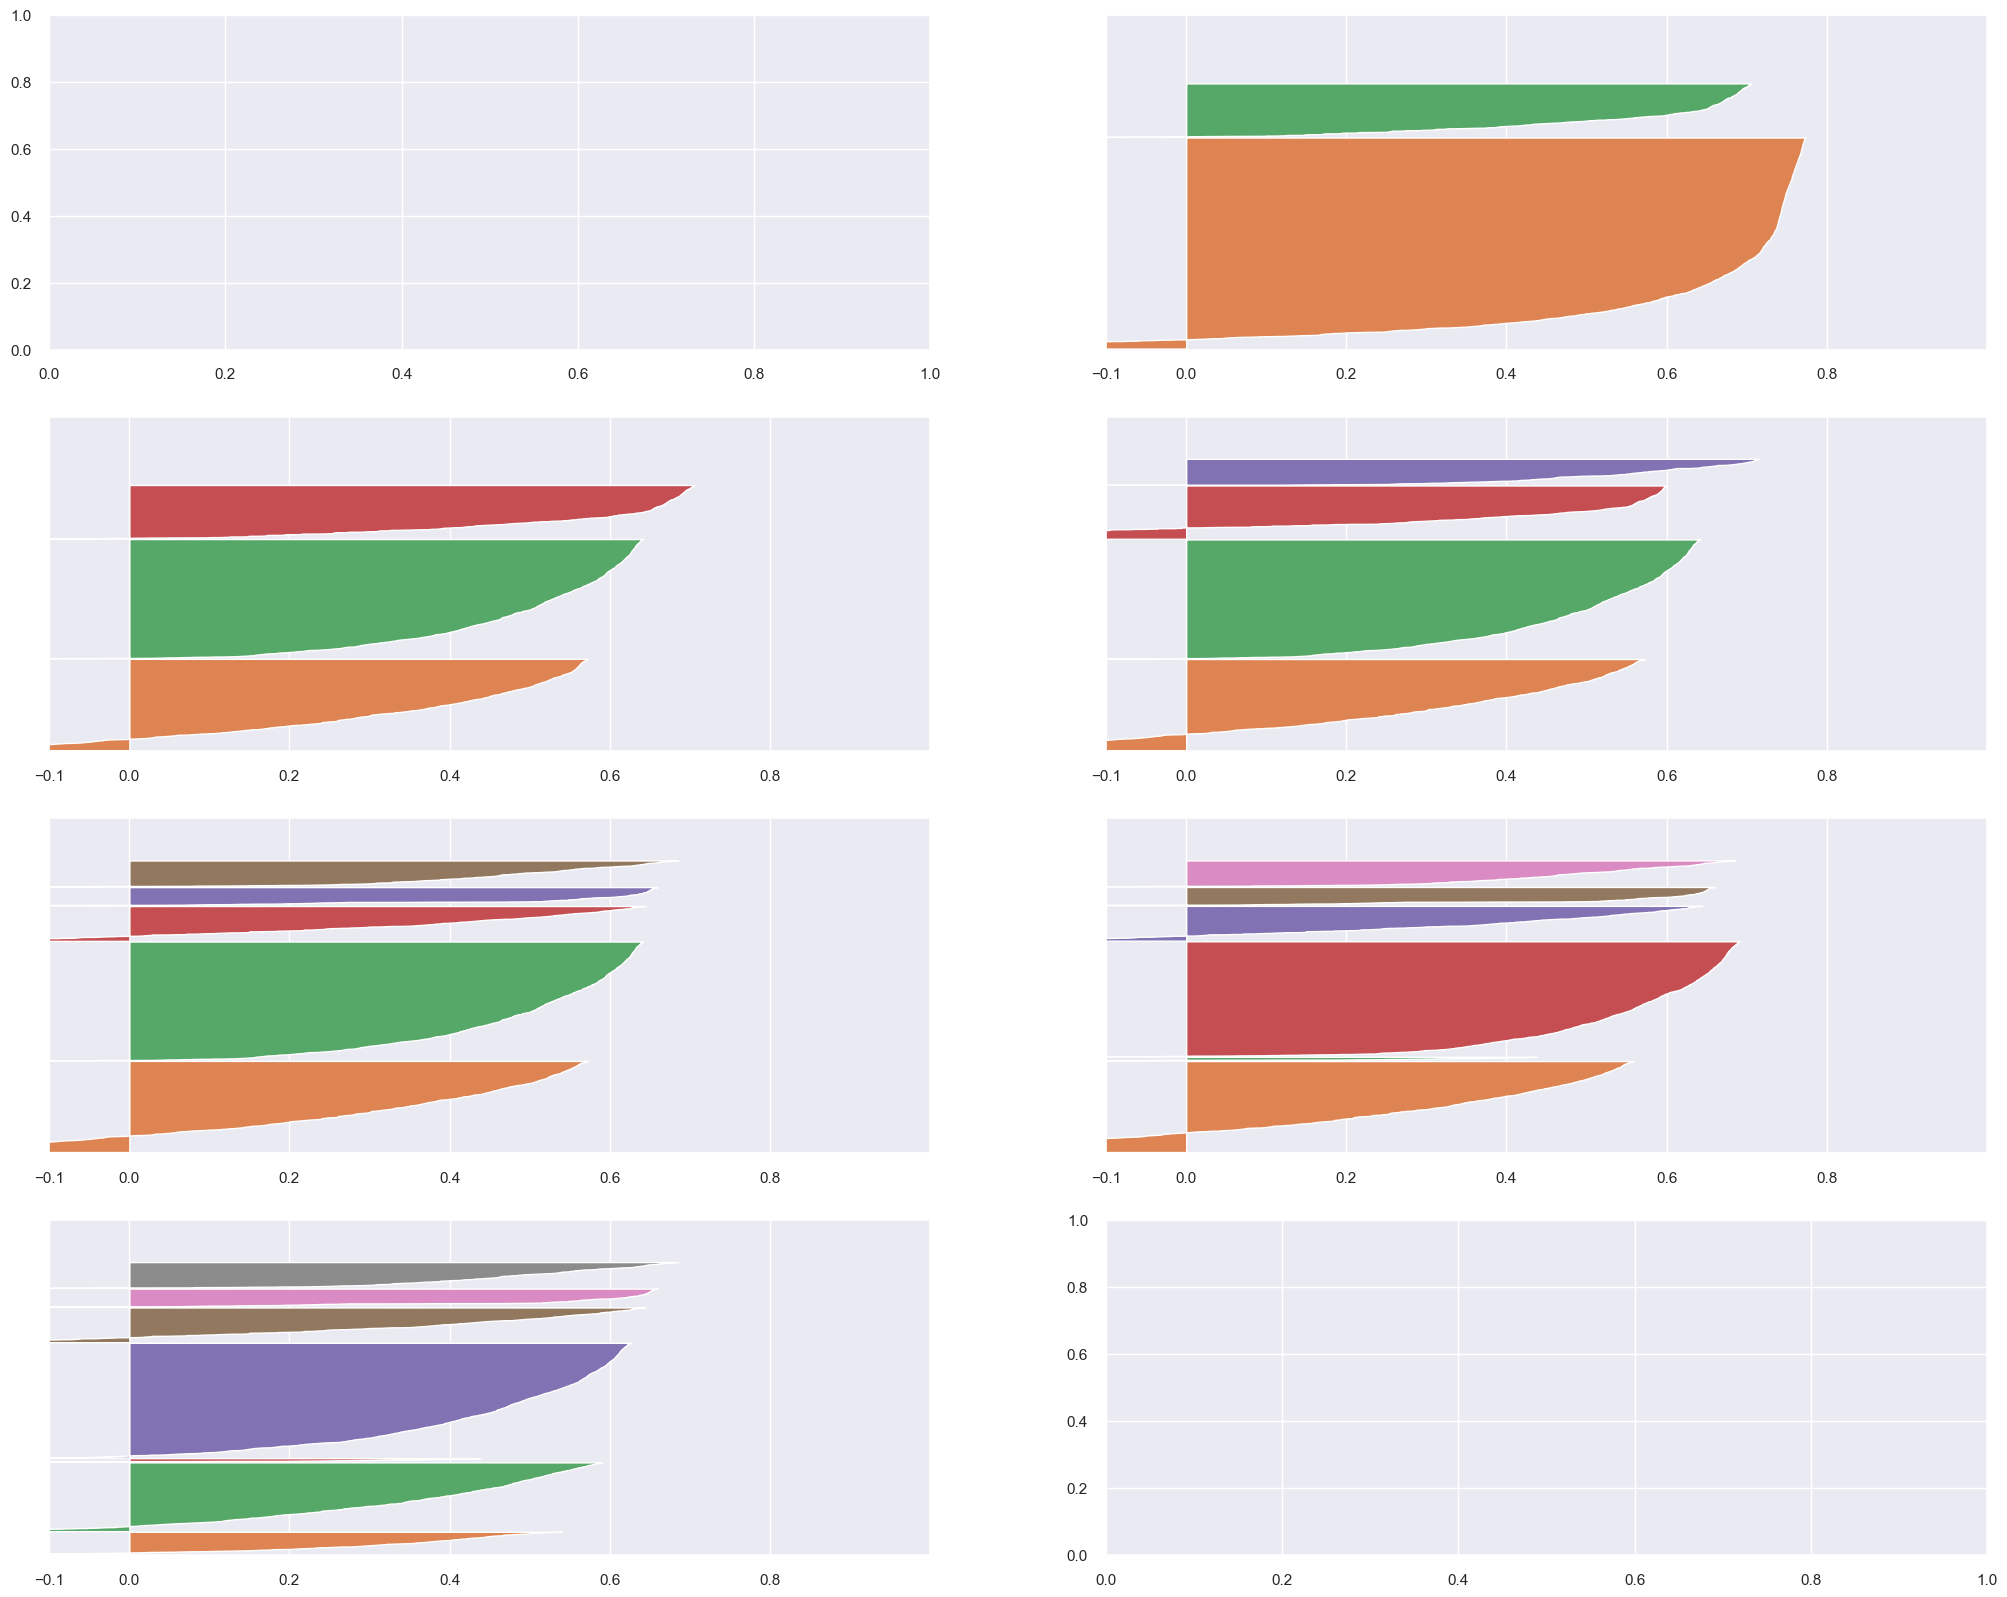

In [257]:
#evaluating HC here:
fig, ax = plt.subplots( 4, 2 )
fig.set_size_inches( 25, 20 )

#for k in clusters_em:
for k in clusters_plot:
    #position to plot
    q, mod = divmod( k, 2 )
    ax[q-1, mod].set_xlim( [ -0.1, 1] )
    ax[q-1, mod].set_ylim( [ 0, len( X ) + ( k+1 )*10] )
    
    # model definition & training
    hc_model = hc.linkage( X, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # performance
    ss = m.silhouette_score( X, labels, metric='euclidean' )
    print( ' For K = {}. Silhouette Score: {}'.format( k, ss ) )

    #get silhouette values of each sample
    samples_silhouette_values = m.silhouette_samples( X, labels )

    #space between clusters
    y_lower = 10
    for i in range( k ):

        # select clusters
        ith_samples_silhouette_values = samples_silhouette_values[ labels == i]
        
        # sort values
        ith_samples_silhouette_values.sort()

        # size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # define colors range
        cmap = cm.get_cmap( 'Spectral' )
        color = cmap( i / k )

        ax[q-1, mod].fill_betweenx( np.arange( y_lower, y_upper ), 0, ith_samples_silhouette_values  )
        
        y_lower = y_upper + 10
        
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks( [-0.1, 0, 0.2, 0.4, 0.6, 0.8] )

# Model Training

In [258]:
#let's keep using Umap embedding space, where on HC with 8k, we've got an SS of 0.51 
#8Ks is also a good number of cluster for business team handle actions from them
X = X_em.copy()

In [259]:
#8 clusters, as defined
k = 8

#let's use scipy instead of sklearn, being a simpler implementation.
#model definition and training
hc_model = hc.linkage(X, 'ward')

#model predict
hc_labels = hc.fcluster(hc_model, k, criterion='maxclust')#to cut dendrogram

#model perfomance (SS)
hc_ss = m.silhouette_score(X, hc_labels, metric='euclidean') 
print(f'SS Value for {k} clusters: {hc_ss}')

SS Value for 8 clusters: 0.5193468332290649


# Cluster Analysis

In [260]:
#clusters are now defined, let's analyze them and generate the cluster profiles to business team 

In [261]:
df9 = X.copy()

## Visualization Inspection

In [262]:
df9['cluster'] = hc_labels
df9.head()

,embedding_x,embedding_y,cluster
0,15.686619,-6.099525,1
1,-0.614432,4.606266,3
2,-1.989648,-3.996645,8
3,3.698180,7.299434,3
4,11.212939,2.988281,4


In [263]:
df9.to_csv("../data/interim/cycle8/df9_model_training_done.csv")

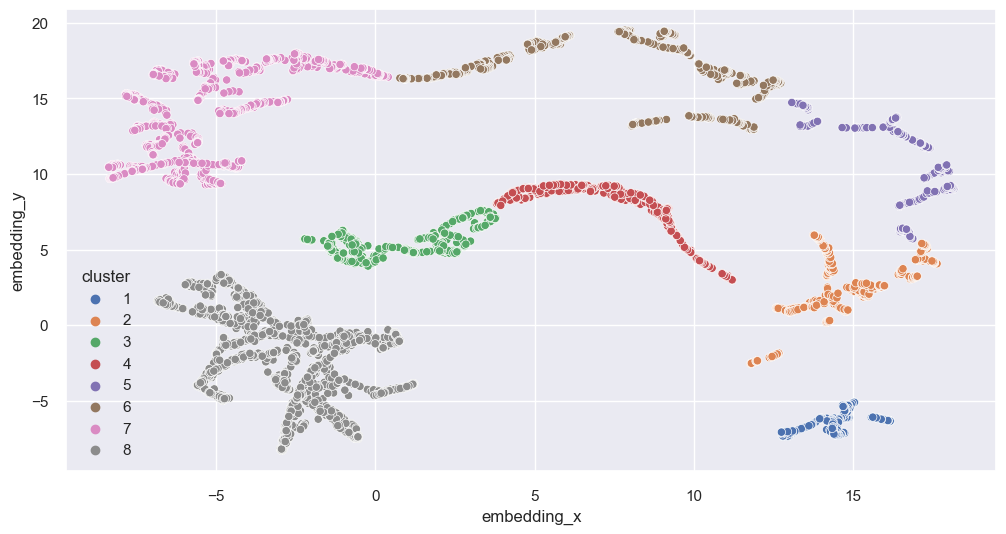

In [264]:
#plot
sns.scatterplot(x='embedding_x', y='embedding_y', hue='cluster', data=df9, palette='deep');

## Cluster Profile

In [266]:
df9p = df4.copy() #df4 contains original values (not reescaled), to use in cluster profile
ids_and_vars_selected = ['customer_id','gross_revenue','recency_days','unique_products','daily_purchase_rate','total_prod_returned']
df9p = df9p[ids_and_vars_selected]
df9p['cluster'] = hc_labels
df9p

,customer_id,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned,cluster
0,17850,5391.21,372.0,21.0,17.000000,40.0,1
1,13047,3232.59,56.0,105.0,0.028302,35.0,3
2,12583,6705.38,2.0,114.0,0.040323,50.0,8
3,13748,948.25,95.0,24.0,0.017921,0.0,3
4,15100,876.00,333.0,1.0,0.073171,22.0,4
...,...,...,...,...,...,...,...
5779,22706,5699.00,1.0,634.0,1.000000,0.0,8
5780,22707,6756.06,0.0,730.0,1.000000,0.0,8
5781,22708,3217.20,0.0,56.0,1.000000,0.0,7
5782,22709,3950.72,0.0,217.0,1.000000,0.0,7


In [267]:
#building df_cluster

# Number of customer
df_cluster = df9p[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = df_cluster['customer_id'] / df_cluster['customer_id'].sum()*100

# Avg gross revenue
df_avg_gross_revenue = df9p[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# Avg recency days
df_avg_recency_days = df9p[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')

# Avg unique products
df_avg_unique_products = df9p[['unique_products','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_unique_products, how='inner', on='cluster')

# Avg daily purchase rate
df_avg_daily_purchase_rate = df9p[['daily_purchase_rate','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_daily_purchase_rate, how='inner', on='cluster')

# Avg total products returned
df_avg_total_prod_returned = df9p[['total_prod_returned','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_total_prod_returned, how='inner', on='cluster')

# cluster profiles
df_cluster.sort_values('gross_revenue', ascending=False)

,cluster,customer_id,perc_customer,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned
7,8,1786,31.371860,3861.640554,17.201568,112.159015,0.061500,42.648936
2,3,509,8.940804,1448.219843,68.840864,60.106090,0.027804,12.388998
1,2,459,8.062533,947.313617,307.518519,93.324619,1.004357,1.494553
3,4,495,8.694888,942.218323,177.333333,42.290909,0.041601,12.800000
5,6,694,12.190409,691.700706,171.952450,59.041787,1.014470,0.968300
6,7,1083,19.023362,638.647608,51.792244,42.975069,1.027645,2.681440
0,1,254,4.461620,549.360866,362.602362,23.393701,1.056134,2.696850
4,5,413,7.254523,330.407240,249.692494,20.878935,1.029056,2.624697


In [291]:
loyals_cluster = 8
df_cluster.to_csv('../data/interim/cycle8/df_cluster_hc_8k.csv')

In [269]:
#generate the repport dinamically:
for i in range(len(df_cluster['customer_id'])):
    print(f""" Cluster {df_cluster['cluster'][i]}:
    -Number of customers: {df_cluster['customer_id'][i]} ({round(df_cluster['perc_customer'][i])}%)
    -Average revenue: ${round(df_cluster['gross_revenue'][i])}
    -Average recency: by each {round(df_cluster['recency_days'][i])} days ({round(df_cluster['recency_days'][i]/7)} week(s))
    -Average unique products purchased: {round(df_cluster['unique_products'][i])}  
    -Average purchases/month: {round((df_cluster['daily_purchase_rate'][i])*30 ,1)} 
    -Average total products returned: {round(df_cluster['total_prod_returned'][i])} """)

 Cluster 1:
    -Number of customers: 254 (4%)
    -Average revenue: $549
    -Average recency: by each 363 days (52 week(s))
    -Average unique products purchased: 23  
    -Average purchases/month: 31.7 
    -Average total products returned: 3 
 Cluster 2:
    -Number of customers: 459 (8%)
    -Average revenue: $947
    -Average recency: by each 308 days (44 week(s))
    -Average unique products purchased: 93  
    -Average purchases/month: 30.1 
    -Average total products returned: 1 
 Cluster 3:
    -Number of customers: 509 (9%)
    -Average revenue: $1448
    -Average recency: by each 69 days (10 week(s))
    -Average unique products purchased: 60  
    -Average purchases/month: 0.8 
    -Average total products returned: 12 
 Cluster 4:
    -Number of customers: 495 (9%)
    -Average revenue: $942
    -Average recency: by each 177 days (25 week(s))
    -Average unique products purchased: 42  
    -Average purchases/month: 1.2 
    -Average total products returned: 13 
 Cluster

# EDA - Insights

### Hypothesis Mindmap

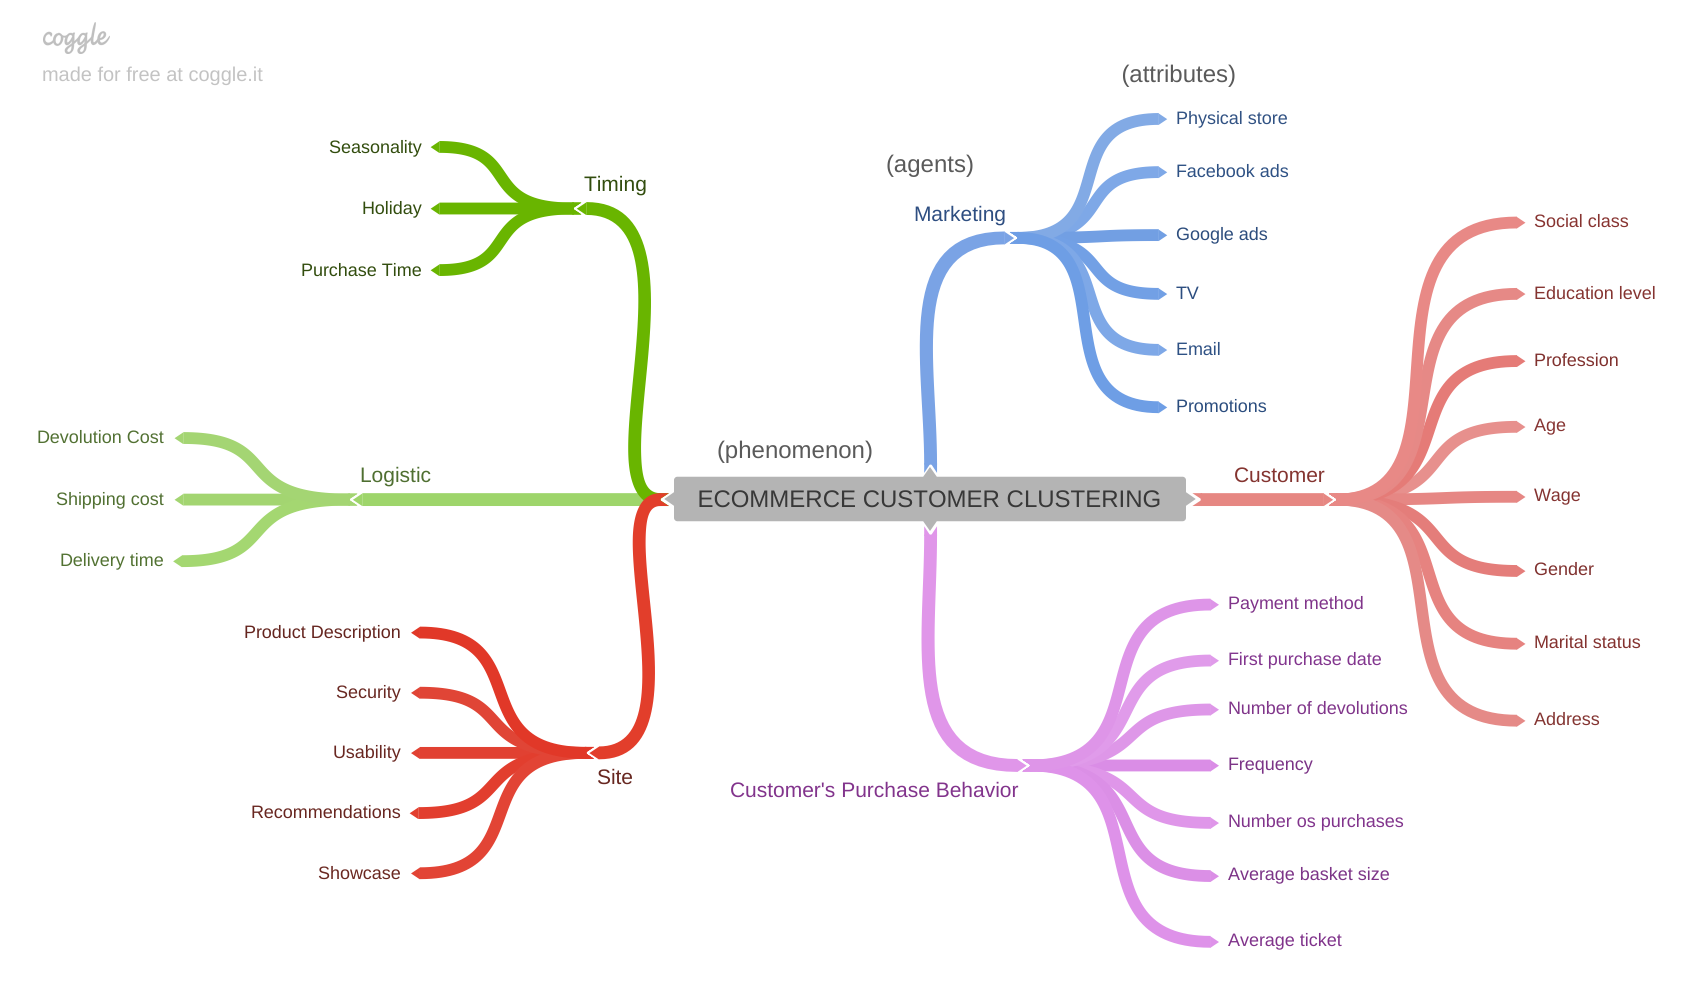

In [270]:
#created with Coggle.it
Image ('../reports/mindmap_hypotheses.png')

### Business Hipothesis

Hypotheses:
- Are statements
- Compare two variables
- Has base value for comparison

Customer's Purchase Behavior Hypotheses:
- Customers in the Loyals cluster use a credit card for 80% of their purchases.
- Customers in the Loyals cluster have an average ticket 10% above the Great but Gross cluster.
- Customers in the Loyals cluster have an average basket size of over 5 products.
- Customers in the Loyals cluster have an average unique product purchased above 10% of total purchases.
- Customers in the Loyals cluster have an average number of returns 10% below the average of the total customer base.
- The median revenue for the Insiders cluster is 10% higher than the median revenue for all clusters.

Customer Hypotheses:
- 60% of Loyals cluster customers have marital status as single.
- 10% of Loyals cluster customers are in the 24-35 age group.
- 40% of the Loyals cluster delivery locations are within a 50km radius.
- 5% of Loyals cluster customers earn more than $100,000 annually.
- 90% of Loyals cluster customers have completed higher education.

### Hipothesis Priorization

Consider to prioritize:
- Is data availabilable?
- Hypothesis answer is actionable?

Selected:
- H1 - Customers in the Loyals cluster have an average unique product purchased above 10% of total purchases.
- H2 - Customers in the Loyals cluster have an average number of returns 10% below the average of the total customer base.
- H3 - The median revenue for the Insiders cluster is 10% higher than the median revenue for all clusters.

### Hipothesis Validation

In [271]:
#let's work with same ds uded for cluster profile
df10 = df9p.copy()
df10.head()

,customer_id,gross_revenue,recency_days,unique_products,daily_purchase_rate,total_prod_returned,cluster
0,17850,5391.21,372.0,21.0,17.000000,40.0,1
1,13047,3232.59,56.0,105.0,0.028302,35.0,3
2,12583,6705.38,2.0,114.0,0.040323,50.0,8
3,13748,948.25,95.0,24.0,0.017921,0.0,3
4,15100,876.00,333.0,1.0,0.073171,22.0,4


#### - H1 - Customers in the Loyals cluster have an average unique product purchased above 10% of total purchases.
True: 50% of unique product volume came from Loyals cluster.

In [292]:
#average unique product purchased on Loyals:
df_prod_loyals = df10.loc[df10['cluster'] == loyals_cluster ,'unique_products'].sum() 
#average unique product purchased on all cluster:
df_prod_all = df10['unique_products'].sum()

In [293]:
#division
round(df_prod_loyals / df_prod_all *100)

50

* Business Insight: Apply marketing strategies to offer similar products to other clusters, based on those purchased by Loyals, in order to reduce the distance between them in this regard.

#### - H2 - Customers in the Loyals cluster have an average number of returns 10% below the average of the total customer base.
False: Loyals cluster has an average number of returns 256% higher than the average of the total customer base.

In [294]:
#average unique product returned by Loyals:
df_dev_loyals = df10.loc[df10['cluster'] == loyals_cluster ,'total_prod_returned'].mean() 
#average unique product returned by all cluster:
df_dev_all = df10['total_prod_returned'].mean()

In [295]:
#division
round(df_dev_loyals /  df_dev_all * 100)

256

* Business Insight: Given the number of returns well above the expected, carry out a detailed survey of reverse logistics costs with the responsible area, evaluating the negative impact compared to the other positive characteristics of Loyals.

#### H3 - The median revenue for the Loyals cluster is 10% higher than the median revenue for all clusters.
True: The median revenue for the loyals cluster is 155% (1.5x) higher than the median revenue for all clusters.

In [296]:
#median revenue of loyals cluster
df_h3_median_loyals = df10.loc[df10['cluster'] == loyals_cluster, 'gross_revenue'].median() 
#median revenue of all clusters
df_h3_median_all = df10['gross_revenue'].median() 

In [305]:
df_h3_median_loyals

1567.96

In [306]:
df_h3_median_all

612.78

In [297]:
#calculation
((df_h3_median_loyals - df_h3_median_all) / df_h3_median_all)*100

155.87649727471523

  * Business Insight: Assign a dedicated team from the marketing area specifically to take care of the relationship with Loyals, given the representativeness of revenue within the company, in relation to the business.

### Answers Table

**Business Questions:**

#### 1) Who are the people eligible to participate in the Loyals program?

In [298]:
df10.loc[ df10['cluster'] == loyals_cluster , 'customer_id']

2       12583
5       15291
6       14688
7       17809
8       15311
        ...  
5759    22671
5769    22695
5770    22696
5779    22706
5780    22707
Name: customer_id, Length: 1786, dtype: int64

#### 2) How many customers will be part of the group?

In [299]:
df10.loc[ df10['cluster'] == loyals_cluster , 'customer_id'].size

1786

#### 3) What are the main characteristics of these customers?

In [300]:
print(f'Check session Cluster Profile -> Cluster {loyals_cluster}')

Check session Cluster Profile -> Cluster 8


In [301]:
#Info about confidence intervals for Average Revenue
df_loyals = df10.loc[ df10['cluster'] == loyals_cluster , 'gross_revenue']
st.t.interval(alpha = 0.95, #trust level
              df = len(df_loyals-1), #degrees of freedom (df -1)
              loc = np.mean(df_loyals),#mean
              scale = st.sem(df_loyals) ) #std

(3259.162478070622, 4464.118630551993)

We can say that in 95 out of 100 customers, the result will be within the range above.

The other 5% clients have a good chance of not being part of the cluster in the future, because they are more distant of the mean.

In [302]:
np.mean(df_loyals)

3861.640554311308

#### 4) What percentage of revenue contribution comes from Loyals?

In [303]:
#total gross revenue = 100%
df_perc_rev_all = df10['gross_revenue'].sum()
#loyal's gross revenue = %?
df_perc_rev_loyals = df10.loc[ df10['cluster'] == loyals_cluster , 'gross_revenue'].sum() 

In [304]:
#calculate percentage:
round((df_perc_rev_loyals / df_perc_rev_all)*100)

69

#### 5) What is the expected revenue for this group for the coming months?

Won't be answared right now, cause we would need more data to work with time series.

#### 6) What are the conditions for a person to be eligible for Loyals?

The model will tell us. 
Let's run the model monthly, for example, and each time, we create a Data and Cluster column, and the person will continue in Loyals, or fall into another cluster.

#### What are the conditions for a person to be removed from Loyals?

The model will tell us too, works like explained on previous question.

#### What is the guarantee that the Loyals program is better than the rest of the base?

An A/B test or a Hypothesis test can be run on next cycles to answer this.

#### What actions can the marketing team take to increase revenue?

- Discount
- Purchase preference
- Cheaper shipping
- Visit the company
- Offer personal stylist
- Recommend cross selling
- Offer exclusive content

# Business Results

In [394]:
#calculations

#number of loyals today
tot_loyals_today = df10.loc[df10['cluster'] == loyals_cluster, 'customer_id'].count()

#expected loyals on next year (10% more)
tot_loyals_nextyear = round(df10.loc[df10['cluster'] == loyals_cluster, 'customer_id'].count()*1.1)

#number of new loyals
exp_new_loyals = tot_loyals_nextyear - tot_loyals_today

#gross revenue expectation
 # median revenue of loyals cluster (from H3)
add_revenue_exp = exp_new_loyals * df_h3_median_loyals

In [396]:
print(f"""Regarding financial results, we start from the fact that the median revenue of the Loyals cluster is (1.5x) greater than the median revenue of all clusters, as already explained.

With the premise that the Stand Out Brands marketing team, through the project, will increase the number of Loyals by 10% in the next year, we will have in 10% of the base, a median increase in revenue of 1.5x.

The number of Loyals customers in the last year (373 days) was: {tot_loyals_today}.
The number of Loyals customers expected for the next year will be: {tot_loyals_nextyear}.
We will therefore have {exp_new_loyals} new customers.

Assuming the same median revenue per Loyal, the expected revenue increment is ${round(add_revenue_exp)} """)

Regarding financial results, we start from the fact that the median revenue of the Loyals cluster is (1.5x) greater than the median revenue of all clusters, as already explained.

With the premise that the Stand Out Brands marketing team, through the project, will increase the number of Loyals by 10% in the next year, we will have in 10% of the base, a median increase in revenue of 1.5x.

The number of Loyals customers in the last year (373 days) was: 1786.
The number of Loyals customers expected for the next year will be: 1965.
We will therefore have 179 new customers.

Assuming the same median revenue per Loyal, the expected revenue increment is $280665 
